## Importing

In [ ]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import copy

## Help functions

In [ ]:
def remove_outliers(df, column):
    df_copy = df.copy()
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] <= upper_bound)]
    return df_copy

In [ ]:
def plot_boxplot(df, columns_to_plot, num_cols, color):
    num_plots = len(columns_to_plot)
    num_rows = (num_plots + num_cols - 1) // num_cols

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(14, 6*num_rows))
    axs = axs.flatten()

    for i, column in enumerate(columns_to_plot):
        sb.boxplot(data=df[column], ax=axs[i], color=color)
        axs[i].set_title(f'Boxplot of {column}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylim(0, 1450)
        axs[i].set_ylabel(column)

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axs[i])

    plt.tight_layout()
    plt.show()

# Non Pilot Data

## Eye-tracking analysis

### Gaze

In this section, we will load and preprocess gaze data from the eye-tracking.

In [ ]:
gaze_non_pilot = pd.read_csv('gaze_sofiia.csv')

In [ ]:
gaze_non_pilot.head()

section id                          recording id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

        timestamp [ns]  gaze x [px]  gaze y [px]  worn  fixation id  blink id  \
0  1716479123922351133      729.784     1041.068   1.0          NaN       NaN   
1  1716479123927351133      686.099     1007.823   1.0          NaN       NaN   
2  1716479123932351133      742.671     1032.708   1.0          NaN       NaN   
3  1716479123937351133      690.385     1012.463   1.0          NaN       NaN   
4  1716479123942476133      743.375     1033.172   1.0          NaN       NaN   

   azimuth [deg]  elevation [deg]  
0      -5.481927       -27.871359  
1      -8.453112       -25.673950  
2      -4.560109       -27.347290  
3      -8.168607       -25.978665  
4      -4.511439       -27.377792

In [ ]:
gaze_non_pilot.shape

(68202, 10)

In [ ]:
gaze_non_pilot.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gaze x [px]',
       'gaze y [px]', 'worn', 'fixation id', 'blink id', 'azimuth [deg]',
       'elevation [deg]'],
      dtype='object')

In [ ]:
column_names_gaze = {'section id' : 'section_id',
                     'recording id' : 'recording_id',
                     'timestamp [ns]' : 'timestamp',
                     'gaze x [px]' : 'gaze_x',
                     'gaze y [px]' : 'gaze_y',
                     'fixation id' : 'fixation_id',
                     'blink id' : 'blink_id',
                     'azimuth [deg]' : 'azimuth',
                     'elevation [deg]' : 'elevation'}

gaze_non_pilot = gaze_non_pilot.rename(columns=column_names_gaze)

In [ ]:
gaze_non_pilot['timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in gaze_non_pilot['timestamp']]

In [ ]:
gaze_non_pilot.head()

section_id                          recording_id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

            timestamp   gaze_x    gaze_y  worn  fixation_id  blink_id  \
0 2024-05-23 15:45:23  729.784  1041.068   1.0          NaN       NaN   
1 2024-05-23 15:45:23  686.099  1007.823   1.0          NaN       NaN   
2 2024-05-23 15:45:23  742.671  1032.708   1.0          NaN       NaN   
3 2024-05-23 15:45:23  690.385  1012.463   1.0          NaN       NaN   
4 2024-05-23 15:45:23  743.375  1033.172   1.0          NaN       NaN   

    azimuth  elevation  
0 -5.481927 -27.871359  
1 -8.453112 -25.673950  
2 -4.560109 -27.347290  
3 -8.168607 -25.978665  
4 -4.511439 -27.377792

In [ ]:
gaze_selected = ['timestamp', 'gaze_x', 'gaze_y']

In [ ]:
gaze_non_pilot_to_corr = gaze_non_pilot[gaze_selected]

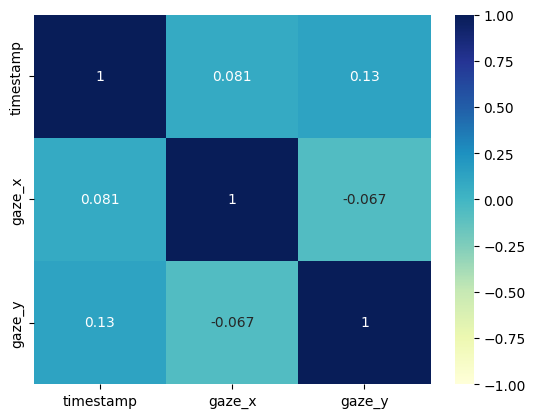

In [ ]:
dataplot_gaze_non_pilot = sb.heatmap(gaze_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [ ]:
gaze_non_pilot_data = gaze_non_pilot[gaze_selected]

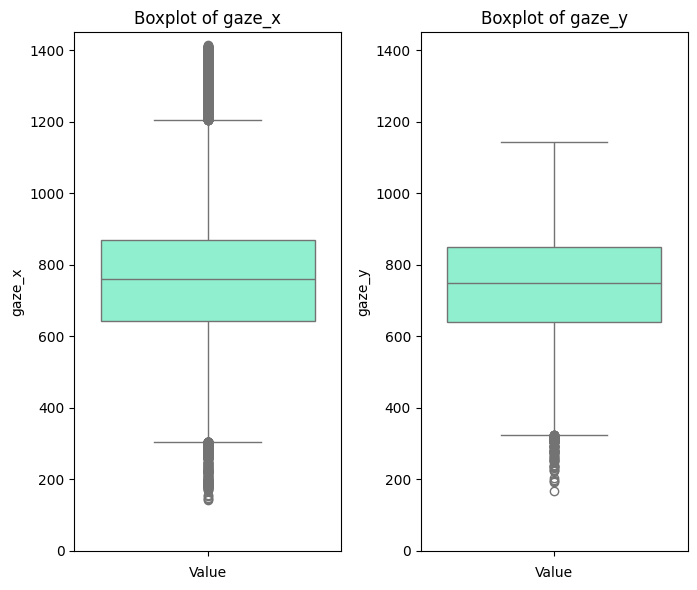

In [ ]:
plot_boxplot(gaze_non_pilot_data.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) + 1, 'aquamarine')

In [ ]:
gaze_non_pilot_filtered = gaze_non_pilot_data.copy()

In [ ]:
for column in gaze_selected:
    gaze_non_pilot_filtered = remove_outliers(gaze_non_pilot_filtered, column)

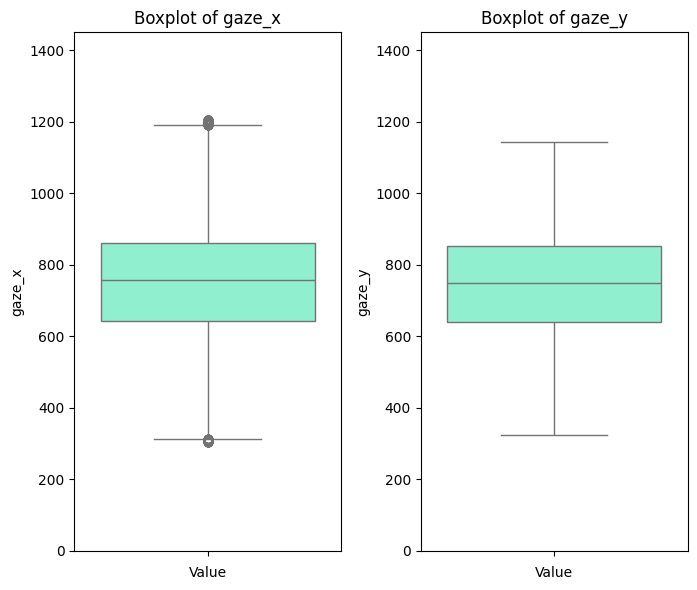

In [ ]:
plot_boxplot(gaze_non_pilot_filtered.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) + 1, 'aquamarine')

### Gaze analysis

In the analysis part, we will plot where the non pilot look on.

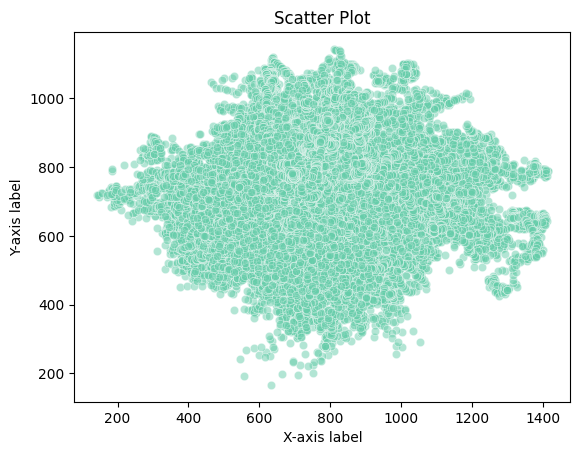

In [ ]:
scatter_plot = sb.scatterplot(data=gaze_non_pilot_data, x='gaze_x', y='gaze_y', color='mediumaquamarine', alpha=0.5)
scatter_plot.set(xlabel="X-axis label", ylabel="Y-axis label", title="Scatter Plot")

plt.show()

hex plot makes more sence for this task.

<Figure size 1000x600 with 0 Axes>

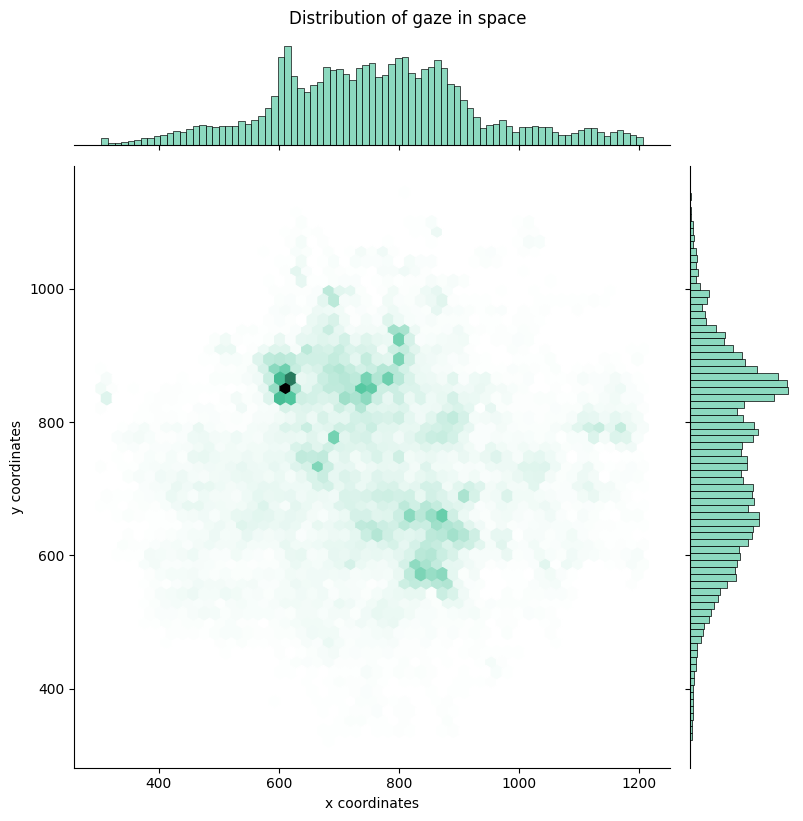

In [ ]:
plt.figure(figsize=(10, 6))
hex_plot = sb.jointplot(data=gaze_non_pilot_filtered, x='gaze_x', y='gaze_y', kind='hex', height=8, color='mediumaquamarine')
hex_plot.set_axis_labels("x coordinates", "y coordinates")
hex_plot.fig.suptitle("Distribution of gaze in space", y=1.02)  # Adjust the title position
plt.show()

we can analyze eye-tracking data by calculating distances between the gaze points.

In [ ]:
gaze_non_pilot_filtered['distance'] = np.sqrt((gaze_non_pilot_filtered['gaze_x'] - gaze_non_pilot_filtered['gaze_x'].shift(1))**2 + (gaze_non_pilot_filtered['gaze_y'] - gaze_non_pilot_filtered['gaze_y'].shift(1))**2)

In [ ]:
gaze_non_pilot_filtered = gaze_non_pilot_filtered.dropna()

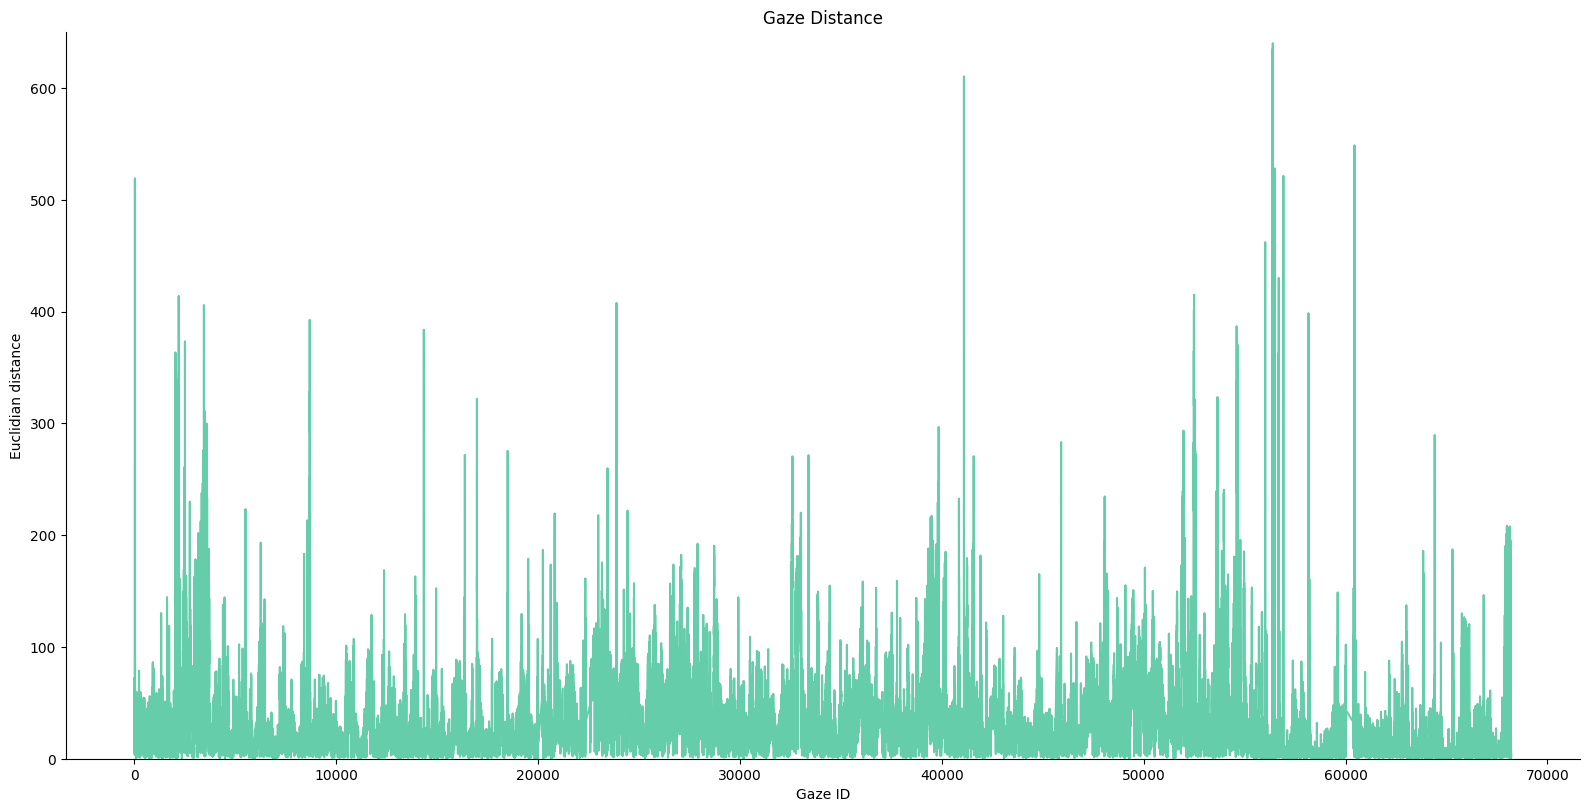

In [ ]:
plot = sb.relplot(data=gaze_non_pilot_filtered, x=gaze_non_pilot_filtered.index, y="distance", kind="line", height=8, aspect=2, color='mediumaquamarine')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

lets make the plot more smooth.

In [ ]:
window_size = 60  # Adjust window size as needed
gaze_non_pilot_filtered['distance_smoothed'] = gaze_non_pilot_filtered['distance'].rolling(window=window_size).mean()

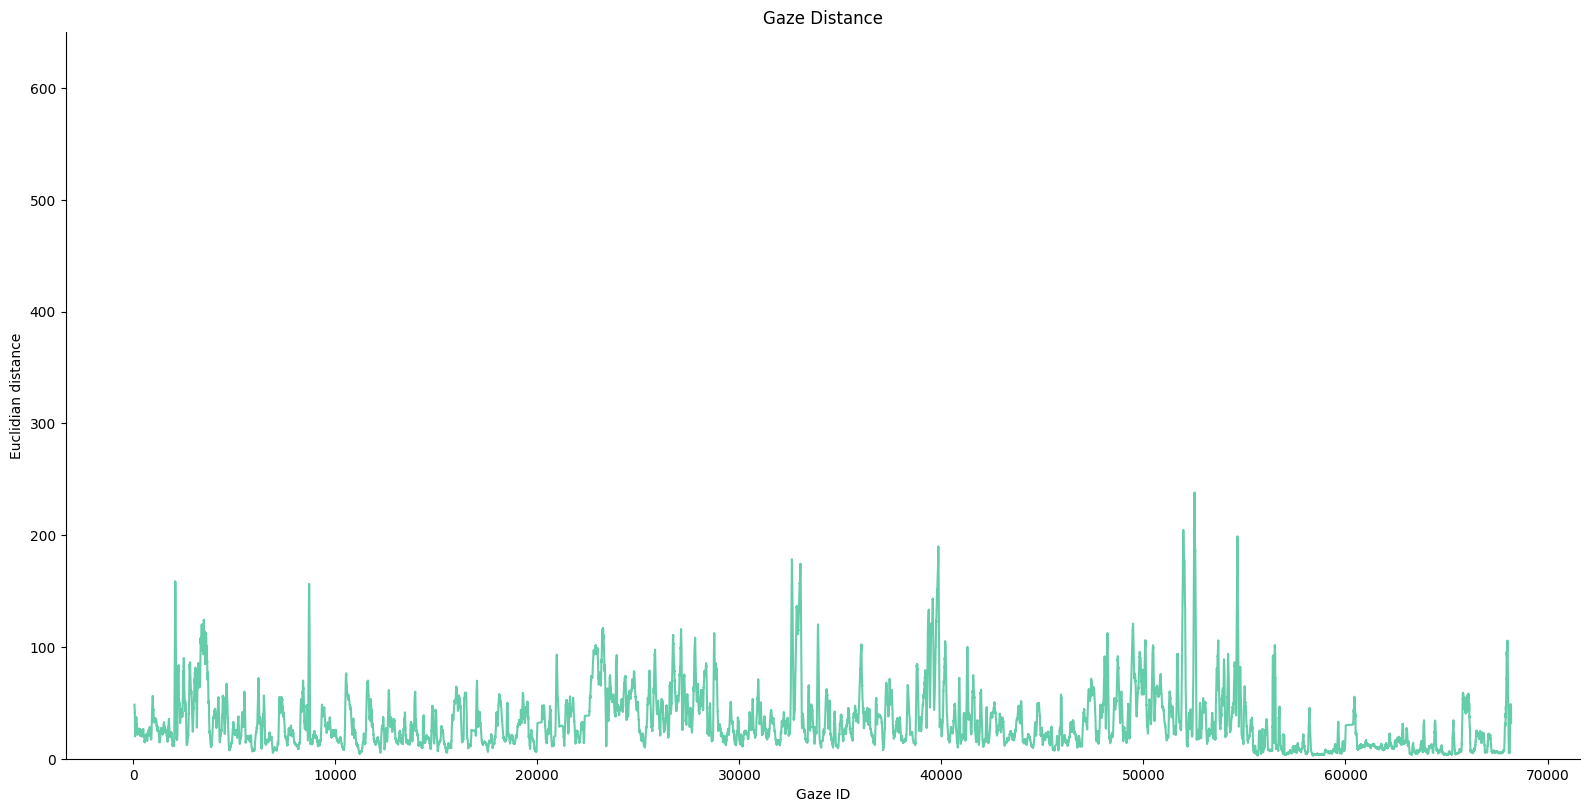

In [ ]:
plot = sb.relplot(data=gaze_non_pilot_filtered, x=gaze_non_pilot_filtered.index, y="distance_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

we should also plot some distributions of the recieved data.

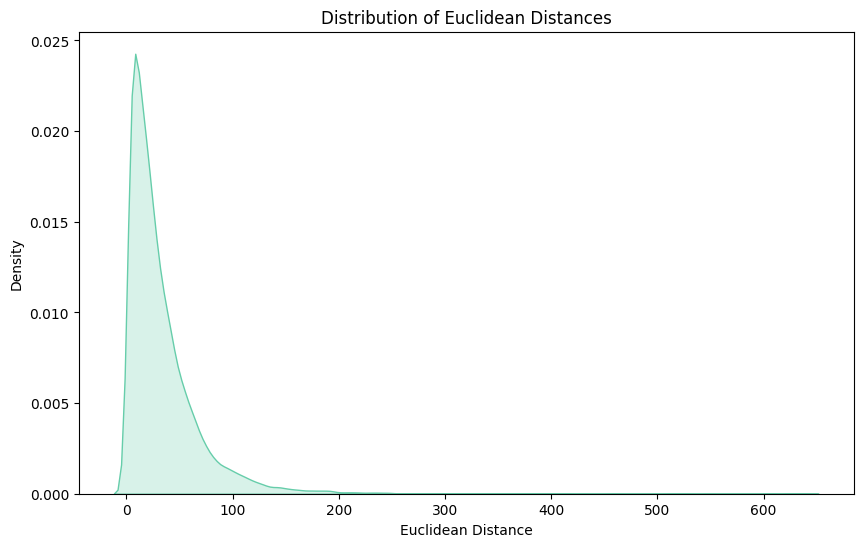

In [ ]:
plt.figure(figsize=(10, 6))
sb.kdeplot(gaze_non_pilot_filtered['distance'], fill=True, color='mediumaquamarine')
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.title("Distribution of Euclidean Distances")
plt.show()

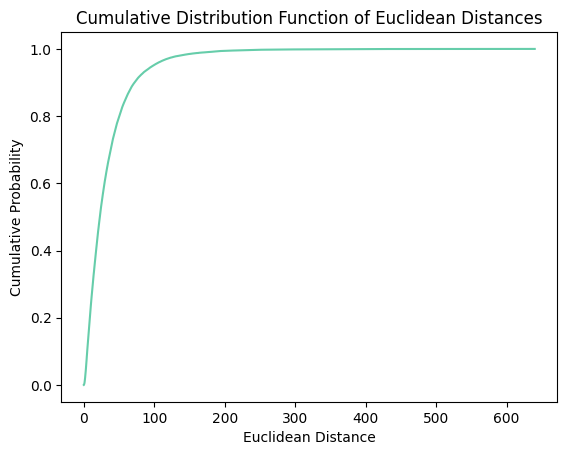

In [ ]:
sorted_data = np.sort(gaze_non_pilot_filtered['distance'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

plt.plot(sorted_data, cdf, color='mediumaquamarine')
plt.xlabel("Euclidean Distance")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function of Euclidean Distances")
plt.show()

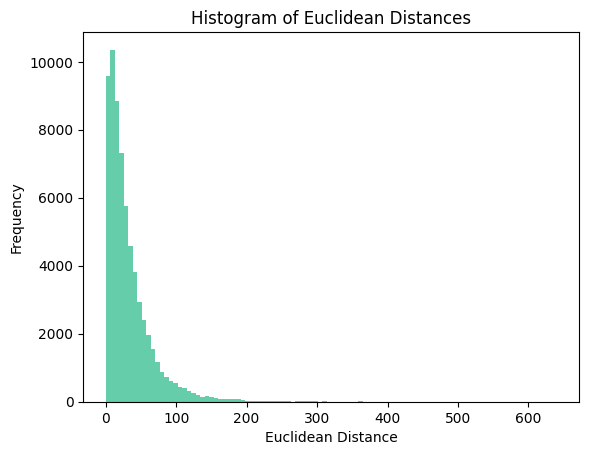

In [ ]:
plt.hist(gaze_non_pilot_filtered['distance'], bins=100, color='mediumaquamarine')
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Euclidean Distances")
plt.show()

### Saccades

here we would load saccades data

In [ ]:
saccades_non_pilot = pd.read_csv(
    '/Users/sophiayeremeeva/Desktop/uni/waterloo/2024/pilot /code/eye-tracking-hand-movement/data/eye-tracking/sofiia_piloting/saccades.csv')

In [ ]:
saccades_non_pilot.columns

Index(['section id', 'recording id', 'saccade id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'amplitude [px]',
       'amplitude [deg]', 'mean velocity [px/s]', 'peak velocity [px/s]'],
      dtype='object')

In [ ]:
saccades_non_pilot.head()

section id                          recording id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   saccade id  start timestamp [ns]   end timestamp [ns]  duration [ms]  \
0           1   1716479123972476133  1716479124122601133            150   
1           2   1716479124247726133  1716479124282726133             35   
2           3   1716479124447851133  1716479124522976133             75   
3           4   1716479124633101133  1716479124648101133             15   
4           5   1716479125103475133  1716479125178600133             75   

   amplitude [px]  amplitude [deg]  mean velocity [px/s]  peak velocity [px/s]  
0       56.181703         3.582817           3343.292202          10438.884136  
1       24.636285         1.560755           1015.232844           1365.360838  
2       21.125843         1.341992            912.064894           1140.957758  
3        5.814321         0.370758            991.302205           1100.348723  
4       57.797500         3.655549           1029.469100           1873.457989

In [ ]:
column_names_saccades = {'section id': 'section_id',
                         'recording id': 'recording_id',
                         'saccade id': 'saccade_id',
                         'start timestamp [ns]': 'start_timestamp',
                         'end timestamp [ns]': 'end_timestamp',
                         'duration [ms]': 'duration',
                         'amplitude [px]': 'amplitude_px',
                         'amplitude [deg]': 'amplitude_deg',
                         'mean velocity [px/s]': 'mean_velocity',
                         'peak velocity [px/s]': 'peak_velocity'}

saccades_non_pilot = saccades_non_pilot.rename(columns=column_names_saccades)

In [ ]:
saccades_non_pilot.head()

section_id                          recording_id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   saccade_id      start_timestamp        end_timestamp  duration  \
0           1  1716479123972476133  1716479124122601133       150   
1           2  1716479124247726133  1716479124282726133        35   
2           3  1716479124447851133  1716479124522976133        75   
3           4  1716479124633101133  1716479124648101133        15   
4           5  1716479125103475133  1716479125178600133        75   

   amplitude_px  amplitude_deg  mean_velocity  peak_velocity  
0     56.181703       3.582817    3343.292202   10438.884136  
1     24.636285       1.560755    1015.232844    1365.360838  
2     21.125843       1.341992     912.064894    1140.957758  
3      5.814321       0.370758     991.302205    1100.348723  
4     57.797500       3.655549    1029.469100    1873.457989

In [ ]:
saccades_non_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in saccades_non_pilot['start_timestamp']]

In [ ]:
saccades_non_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in saccades_non_pilot['end_timestamp']]

In [ ]:
saccades_non_pilot.head()

section_id                          recording_id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   saccade_id     start_timestamp       end_timestamp  duration  amplitude_px  \
0           1 2024-05-23 11:45:23 2024-05-23 11:45:24       150     56.181703   
1           2 2024-05-23 11:45:24 2024-05-23 11:45:24        35     24.636285   
2           3 2024-05-23 11:45:24 2024-05-23 11:45:24        75     21.125843   
3           4 2024-05-23 11:45:24 2024-05-23 11:45:24        15      5.814321   
4           5 2024-05-23 11:45:25 2024-05-23 11:45:25        75     57.797500   

   amplitude_deg  mean_velocity  peak_velocity  
0       3.582817    3343.292202   10438.884136  
1       1.560755    1015.232844    1365.360838  
2       1.341992     912.064894    1140.957758  
3       0.370758     991.302205    1100.348723  
4       3.655549    1029.469100    1873.457989

In [ ]:
saccades_selected = ['start_timestamp', 'duration', 'amplitude_deg', 'mean_velocity']

In [ ]:
saccades_non_pilot_to_corr = saccades_non_pilot[saccades_selected]

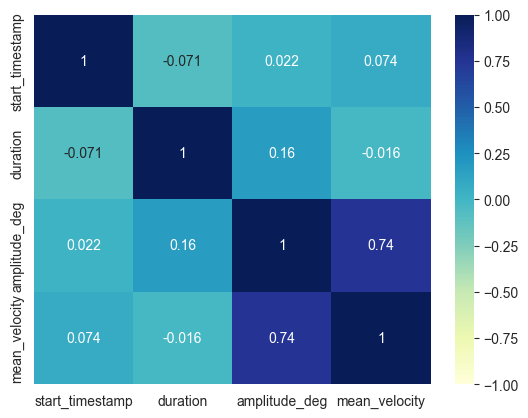

In [ ]:
dataplot_saccades = sb.heatmap(saccades_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

In [ ]:
saccades_non_pilot_data = saccades_non_pilot[saccades_selected]

In [ ]:
saccades_non_pilot_data.head(100)

start_timestamp  duration  amplitude_deg  mean_velocity
0  2024-05-23 11:45:23       150       3.582817    3343.292202
1  2024-05-23 11:45:24        35       1.560755    1015.232844
2  2024-05-23 11:45:24        75       1.341992     912.064894
3  2024-05-23 11:45:24        15       0.370758     991.302205
4  2024-05-23 11:45:25        75       3.655549    1029.469100
..                 ...       ...            ...            ...
95 2024-05-23 11:46:08        15       1.047224    1070.448499
96 2024-05-23 11:46:09        90       1.068387    2587.007395
97 2024-05-23 11:46:09        84      23.623585    4317.498632
98 2024-05-23 11:46:09        55      10.531167    3041.843813
99 2024-05-23 11:46:10       105      33.017308    4887.707540

[100 rows x 4 columns]

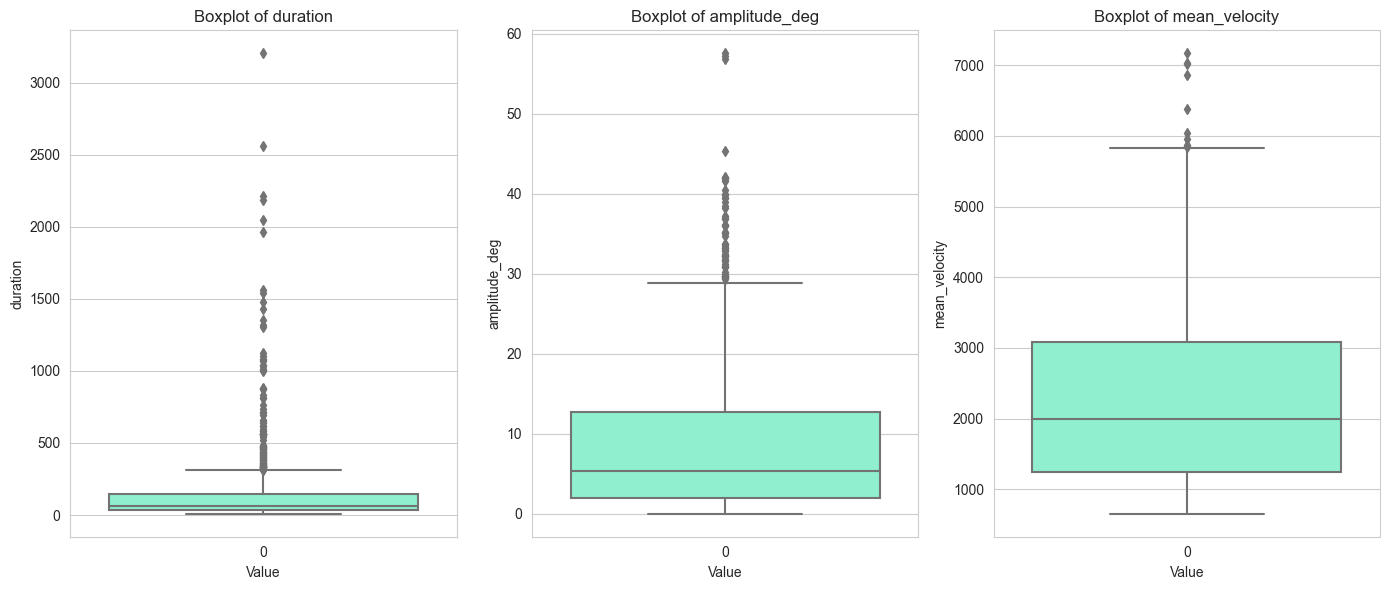

In [ ]:
plot_boxplot(saccades_non_pilot_data.iloc[:, 1:], saccades_selected[1:], len(saccades_selected) - 1, color='aquamarine')

In [ ]:
saccades_non_pilot_filtered = saccades_non_pilot_data.copy()

In [ ]:
for column in saccades_selected:
    saccades_non_pilot_filtered = remove_outliers(saccades_non_pilot_filtered, column)

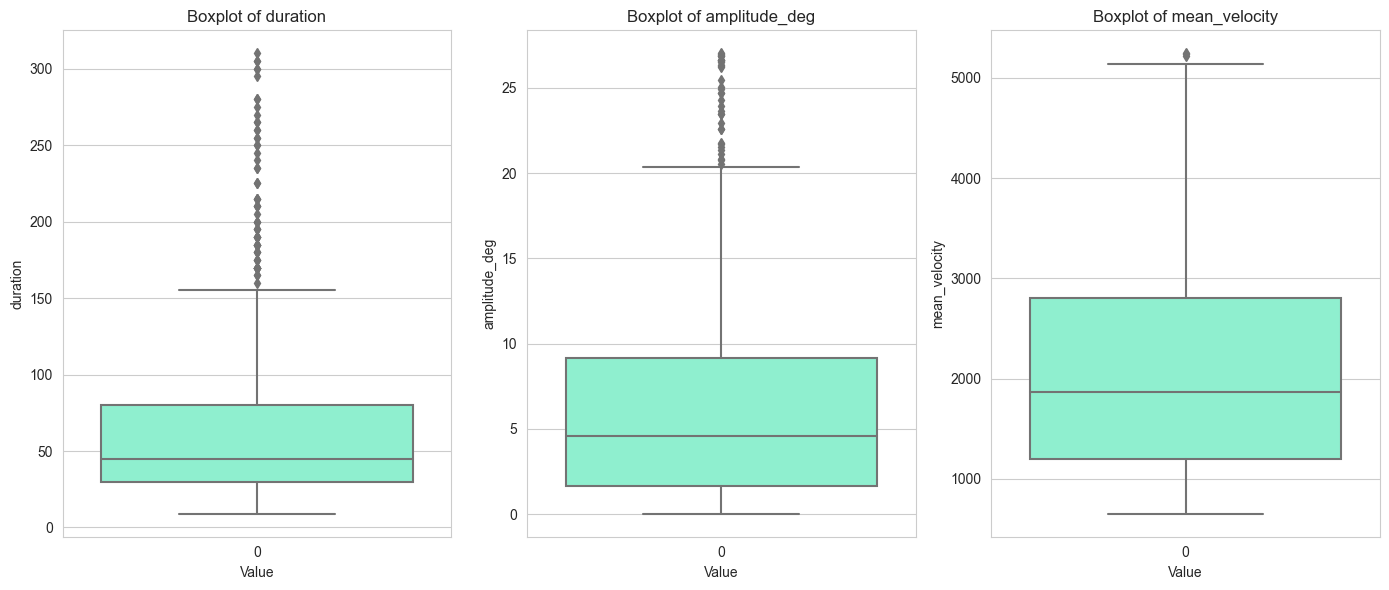

In [ ]:
plot_boxplot(saccades_non_pilot_filtered.iloc[:, 1:], saccades_selected[1:], len(saccades_selected) - 1, color='aquamarine')

### Saccades analysis

we can plot the duration of the saccades.

In [ ]:
saccades_non_pilot_filtered.describe()

start_timestamp    duration  amplitude_deg  mean_velocity
count                            617  617.000000     617.000000     617.000000
mean   2024-05-23 11:48:30.419773184   67.732577       6.652174    2122.120598
min              2024-05-23 11:45:23    9.000000       0.017749     653.743276
25%              2024-05-23 11:47:07   30.000000       1.666947    1194.358028
50%              2024-05-23 11:48:34   45.000000       4.578311    1870.490738
75%              2024-05-23 11:50:02   80.000000       9.175331    2799.491052
max              2024-05-23 11:51:07  310.000000      27.013139    5241.866593
std                              NaN   60.845996       6.502682    1086.361865

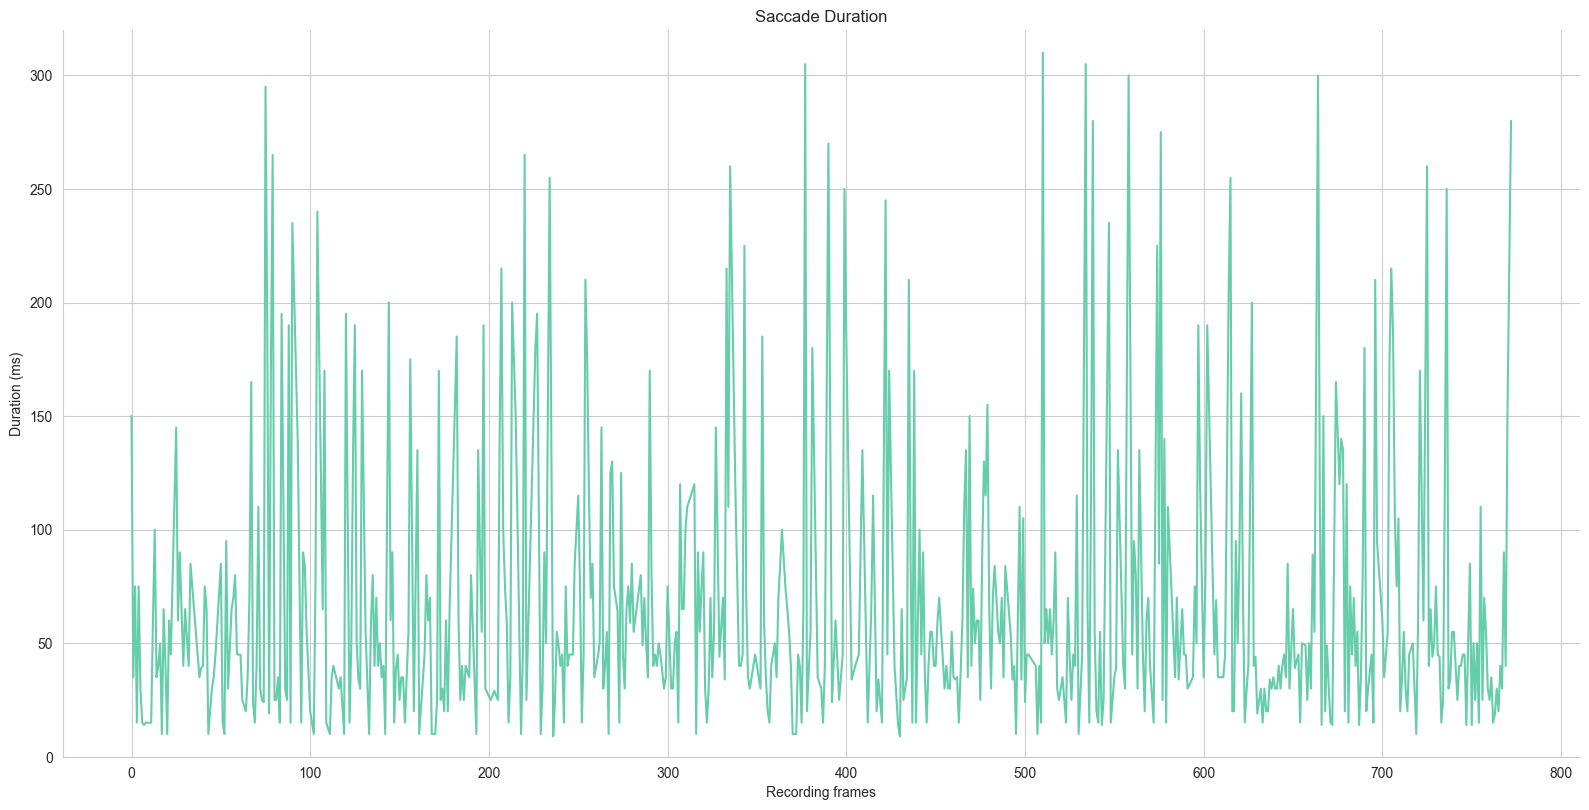

In [ ]:
g = sb.relplot(data=saccades_non_pilot_filtered, x=saccades_non_pilot_filtered.index, y="duration", kind="line", height=8, aspect=2, color='mediumaquamarine')
g.set(xlabel="Recording frames", ylabel="Duration (ms)", title="Saccade Duration")
g.ax.set_ylim(0, 320)
plt.show()

and smooth it as well.

In [ ]:
window_size = 40  # Adjust window size as needed
saccades_non_pilot_filtered['duration_smoothed'] = saccades_non_pilot_filtered['duration'].rolling(window=window_size).mean()

NameError: name 'saccades_non_pilot_filtered' is not defined

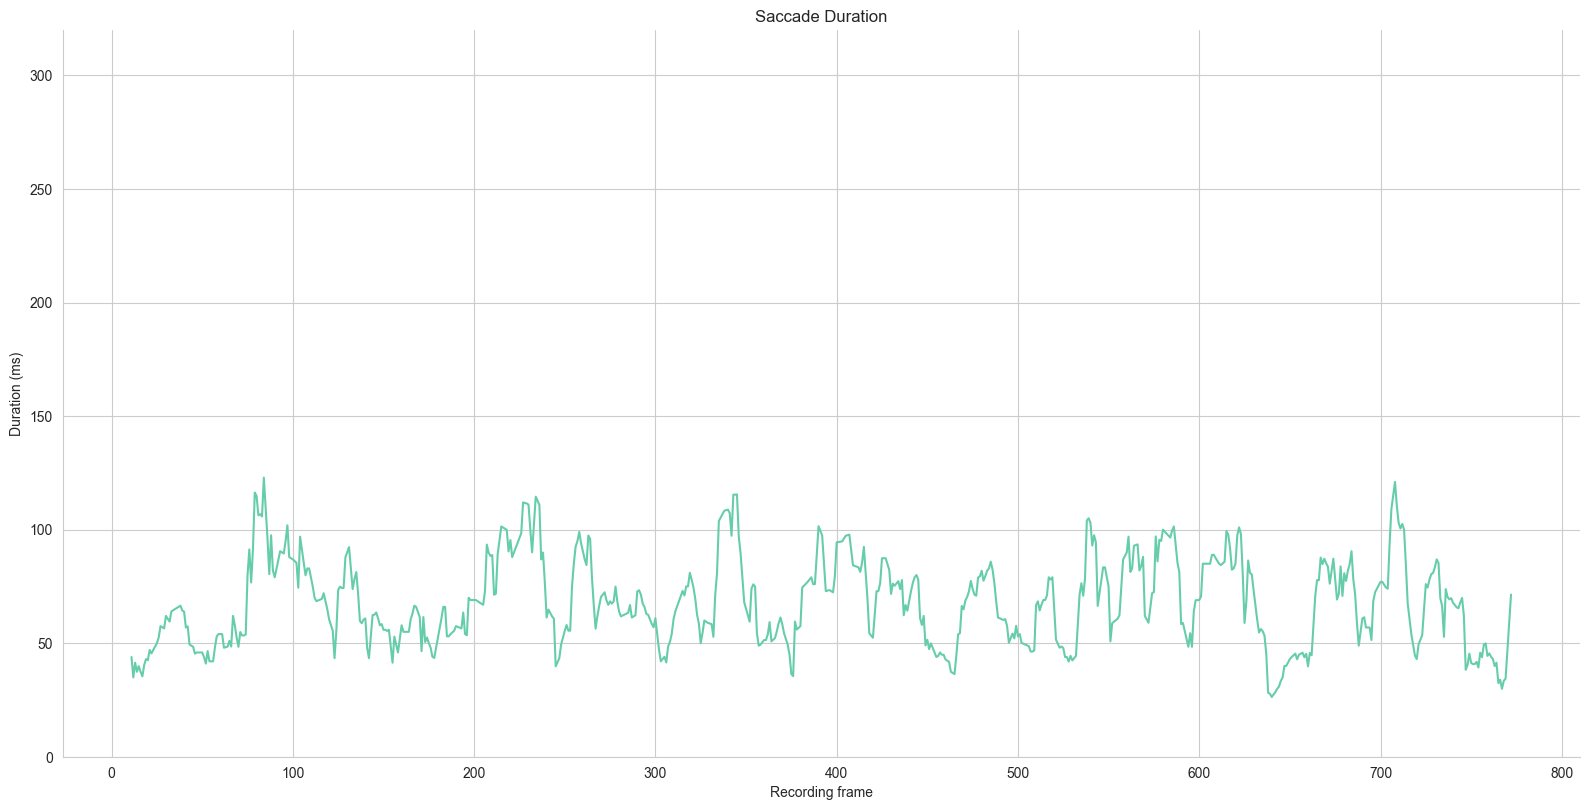

In [ ]:
g = sb.relplot(data=saccades_non_pilot_filtered, x=saccades_non_pilot_filtered.index, y="duration_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
g.set(xlabel="Recording frame", ylabel="Duration (ms)", title="Saccade Duration")
g.ax.set_ylim(0, 320)
plt.show()

### Fixations

loading the fixations data.

In [ ]:
fixations_non_pilot = pd.read_csv('fixations_sofiia.csv')

In [ ]:
fixations_non_pilot.head()

section id                          recording id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   fixation id  start timestamp [ns]   end timestamp [ns]  duration [ms]  \
0            1   1716479124122601133  1716479124247726133            125   
1            2   1716479124282726133  1716479124447851133            165   
2            3   1716479124522976133  1716479124633101133            110   
3            4   1716479124648101133  1716479125103475133            455   
4            5   1716479125178600133  1716479126159474133            980   

   fixation x [px]  fixation y [px]  azimuth [deg]  elevation [deg]  
0          680.147          962.668      -8.739473       -22.766109  
1          693.138          959.517      -7.843286       -22.582656  
2          681.388          952.014      -8.627948       -22.083784  
3          675.707          951.455      -9.013979       -22.039280  
4          709.981          995.429      -6.765663       -24.913040

In [ ]:
fixations_non_pilot.columns

Index(['section id', 'recording id', 'fixation id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'fixation x [px]',
       'fixation y [px]', 'azimuth [deg]', 'elevation [deg]'],
      dtype='object')

In [ ]:
fixations_non_pilot.shape

(773, 10)

In [ ]:
column_names_fixations = {'section id' : 'section_id',
                          'recording id' : 'recording_id',
                          'fixation id' : 'fixation_id',
                          'start timestamp [ns]' : 'start_timestamp',
                          'end timestamp [ns]' : 'end_timestamp',
                          'duration [ms]' : 'duration',
                          'fixation x [px]' : 'fixation_x',
                          'fixation y [px]' : 'fixation_y',
                          'azimuth [deg]' : 'azimuth',
                          'elevation [deg]': 'elevation'}

fixations_non_pilot = fixations_non_pilot.rename(columns=column_names_fixations)

In [ ]:
fixations_non_pilot.head()

section_id                          recording_id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   fixation_id      start_timestamp        end_timestamp  duration  \
0            1  1716479124122601133  1716479124247726133       125   
1            2  1716479124282726133  1716479124447851133       165   
2            3  1716479124522976133  1716479124633101133       110   
3            4  1716479124648101133  1716479125103475133       455   
4            5  1716479125178600133  1716479126159474133       980   

   fixation_x  fixation_y   azimuth  elevation  
0     680.147     962.668 -8.739473 -22.766109  
1     693.138     959.517 -7.843286 -22.582656  
2     681.388     952.014 -8.627948 -22.083784  
3     675.707     951.455 -9.013979 -22.039280  
4     709.981     995.429 -6.765663 -24.913040

In [ ]:
fixations_non_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_non_pilot['start_timestamp']]

In [ ]:
fixations_non_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_non_pilot['end_timestamp']]

In [ ]:
to_corr = ['duration', 'fixation_x', 'fixation_y']
fixations_non_pilot_to_corr = fixations_non_pilot[to_corr]

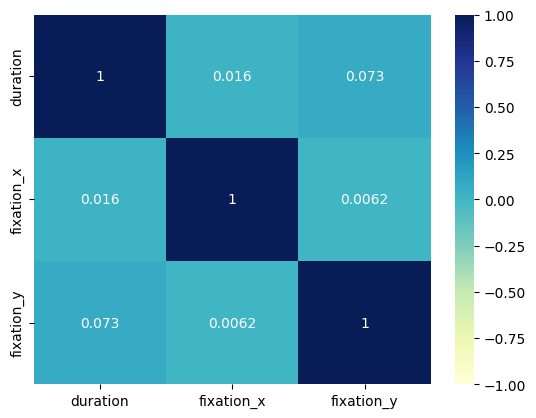

In [ ]:
dataplot_fixations = sb.heatmap(fixations_non_pilot_to_corr.corr(), cmap="YlGnBu", annot=True, vmin=-1, vmax=1)

we will again plot the duration, but for this time for the saccades data.

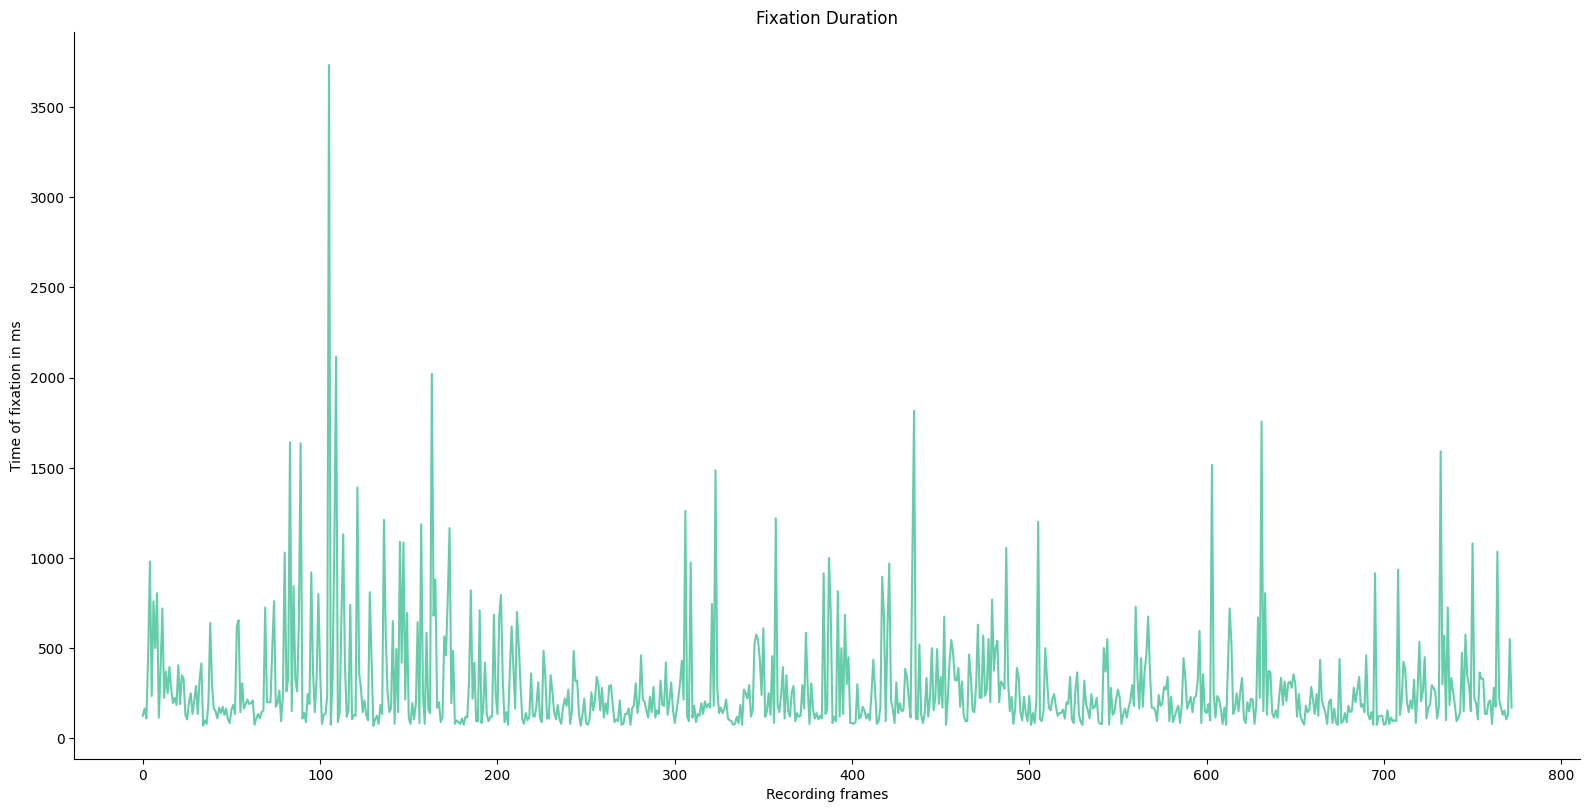

In [ ]:
g2 = sb.relplot(data=fixations_non_pilot, x=fixations_non_pilot.index, y="duration", kind="line", height=8, aspect=2, color='mediumaquamarine')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Fixation Duration")
plt.show()

In [ ]:
window_size = 10  # Adjust window size as needed
fixations_non_pilot['duration_smoothed'] = fixations_non_pilot['duration'].rolling(window=window_size).mean()

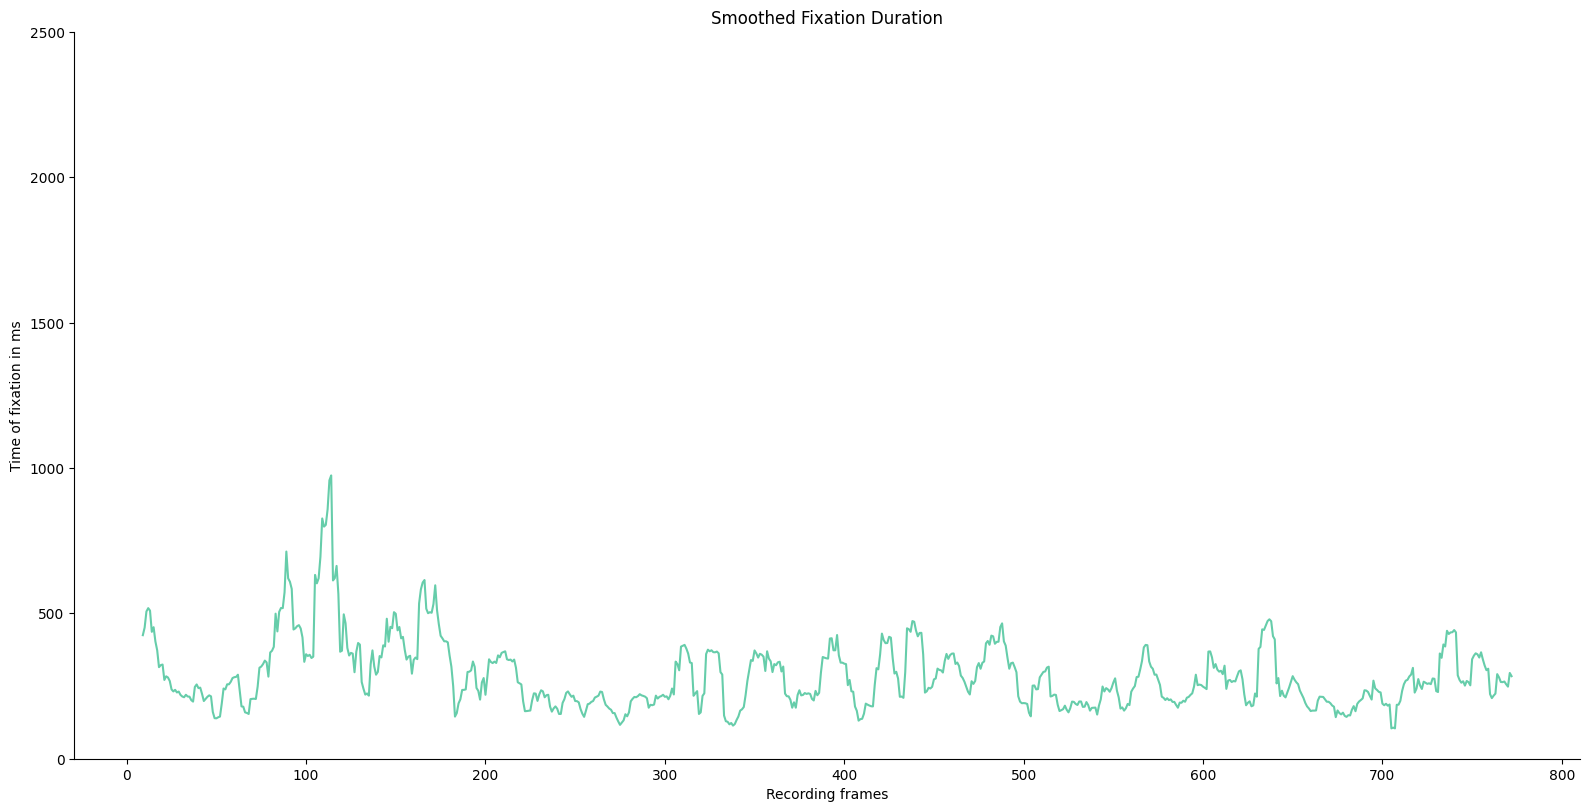

In [ ]:
g2 = sb.relplot(data=fixations_non_pilot, x=fixations_non_pilot.index, y="duration_smoothed", kind="line", height=8, aspect=2, color='mediumaquamarine')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Smoothed Fixation Duration")
g2.ax.set_ylim(0, 2500)
plt.show()

## Hand movement analysis

we will use only one marker for the dataset.

In [ ]:
hand_non_pilot = pd.read_csv('sofiia_hands.csv')

In [ ]:
hand_non_pilot.head(-20)

Mixed Mixed    Mixed.1   Mixed.2   Mixed.3     Mixed.4    Mixed.5  \
0    Frame  Time          X         Y         Z        Type          X   
1        1     0  -1096.202  -397.725  -147.704    Measured  -1006.706   
2        2  0.01  -1096.202  -397.725  -147.704    Measured  -1006.706   
3        3  0.02  -1096.202  -397.725  -147.704    Measured   -1006.72   
4        4  0.03   -1095.06  -395.485  -146.803  Gap-filled  -1007.633   
..     ...   ...        ...       ...       ...         ...        ...   
530    530  5.29          0         0         0         NaN          0   
531    531   5.3          0         0         0         NaN          0   
532    532  5.31          0         0         0         NaN          0   
533    533  5.32          0         0         0         NaN          0   
534    534  5.33          0         0         0         NaN          0   

     Mixed.6 Measured   Mixed.7    Mixed.8  Mixed.9 Mixed.10  Mixed.11  
0          Y        Z      Type          X        Y        Z      Type  
1    575.212   -83.76  Measured   -1013.74  520.245  -40.367  Measured  
2    575.219  -83.781  Measured  -1013.739  520.241  -40.392  Measured  
3    575.239  -83.787  Measured  -1013.756  520.262  -40.407  Measured  
4    568.109  -91.528  Measured  -1013.397  518.785  -39.541  Measured  
..       ...      ...       ...        ...      ...      ...       ...  
530        0        0       NaN   -1141.74  381.745  128.499  Measured  
531        0        0       NaN  -1141.754  381.802  128.524  Measured  
532        0        0       NaN  -1141.762  381.783  128.548  Measured  
533        0        0       NaN   -1141.73  381.793  128.604  Measured  
534        0        0       NaN  -1141.737  381.812  128.599  Measured  

[535 rows x 14 columns]

In [ ]:
hand_non_pilot.columns

Index([' Mixed', 'Mixed', 'Mixed.1', 'Mixed.2', 'Mixed.3', 'Mixed.4',
       'Mixed.5', 'Mixed.6', 'Measured', 'Mixed.7', 'Mixed.8', 'Mixed.9',
       'Mixed.10', 'Mixed.11'],
      dtype='object')

In [ ]:
hand_non_pilot_selected = hand_non_pilot[['Mixed.8', 'Mixed.9','Mixed.10']].iloc[1:]
hand_non_pilot_selected = hand_non_pilot_selected.rename(columns = {'Measured.1':'time', 'Mixed.8': 'x', 'Mixed.9': 'y', 'Mixed.10': 'z'})

In [ ]:
hand_non_pilot_selected.head()

x        y        z
1   -1013.74  520.245  -40.367
2  -1013.739  520.241  -40.392
3  -1013.756  520.262  -40.407
4  -1013.397  518.785  -39.541
5  -1013.787  520.626  -40.632

In [ ]:
hand_non_pilot_selected.describe()

x        y        z
count         554      554      554
unique        492      515      537
top     -1013.834  382.237  -41.137
freq            3        3        2

In [ ]:
hand_non_pilot_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 1 to 554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       554 non-null    object
 1   y       554 non-null    object
 2   z       554 non-null    object
dtypes: object(3)
memory usage: 13.1+ KB


In [ ]:
hand_non_pilot_selected['x'] = pd.to_numeric(hand_non_pilot_selected['x'], errors='coerce')
hand_non_pilot_selected['y'] = pd.to_numeric(hand_non_pilot_selected['y'], errors='coerce')
hand_non_pilot_selected['z'] = pd.to_numeric(hand_non_pilot_selected['z'], errors='coerce')

In [ ]:
hand_non_pilot_selected.head()

x        y       z
1 -1013.740  520.245 -40.367
2 -1013.739  520.241 -40.392
3 -1013.756  520.262 -40.407
4 -1013.397  518.785 -39.541
5 -1013.787  520.626 -40.632

# Pilot Data

## Eye-tracking analysis

same analysis for the pilot

### Gaze

In [ ]:
gaze_pilot = pd.read_csv('gaze_narein.csv')

In [ ]:
gaze_pilot.head()

section id                          recording id  \
0  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
1  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
2  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
3  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
4  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   

        timestamp [ns]  gaze x [px]  gaze y [px]  worn  fixation id  blink id  \
0  1718830663944518591     1004.618      672.953   1.0          NaN       NaN   
1  1718830663949526591     1006.607      677.726   1.0          NaN       NaN   
2  1718830663954517591     1005.920      680.765   1.0          1.0       NaN   
3  1718830663959517591     1010.261      679.473   1.0          1.0       NaN   
4  1718830663964519591     1024.965      668.028   1.0          1.0       NaN   

   azimuth [deg]  elevation [deg]  
0      12.856262        -4.021674  
1      12.988878        -4.329349  
2      12.946196        -4.526068  
3      13.227987        -4.440557  
4      14.177149        -3.695135

In [ ]:
gaze_pilot.columns

Index(['section id', 'recording id', 'timestamp [ns]', 'gaze x [px]',
       'gaze y [px]', 'worn', 'fixation id', 'blink id', 'azimuth [deg]',
       'elevation [deg]'],
      dtype='object')

In [ ]:
column_names_gaze = {'section id': 'section_id',
                     'recording id': 'recording_id',
                     'timestamp [ns]': 'timestamp',
                     'gaze x [px]': 'gaze_x',
                     'gaze y [px]': 'gaze_y',
                     'fixation id': 'fixation_id',
                     'blink id': 'blink_id',
                     'azimuth [deg]': 'azimuth',
                     'elevation [deg]': 'elevation'}

gaze_pilot = gaze_pilot.rename(columns=column_names_gaze)

In [ ]:
gaze_pilot['timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in gaze_pilot['timestamp']]
gaze_pilot.head()

section_id                          recording_id  \
0  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
1  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
2  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
3  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
4  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   

            timestamp    gaze_x   gaze_y  worn  fixation_id  blink_id  \
0 2024-06-19 20:57:43  1004.618  672.953   1.0          NaN       NaN   
1 2024-06-19 20:57:43  1006.607  677.726   1.0          NaN       NaN   
2 2024-06-19 20:57:43  1005.920  680.765   1.0          1.0       NaN   
3 2024-06-19 20:57:43  1010.261  679.473   1.0          1.0       NaN   
4 2024-06-19 20:57:43  1024.965  668.028   1.0          1.0       NaN   

     azimuth  elevation  
0  12.856262  -4.021674  
1  12.988878  -4.329349  
2  12.946196  -4.526068  
3  13.227987  -4.440557  
4  14.177149  -3.695135

Additionally, we remove first 2:33 minutes of recording because of the recording content.

In [ ]:
gaze_pilot = gaze_pilot[gaze_pilot['timestamp'] >= datetime.strptime('2024-06-19 17:00:16', "%Y-%m-%d %H:%M:%S")].reset_index(drop=True)

In [ ]:
gaze_pilot.shape

(251663, 10)

In [ ]:
gaze_pilot = gaze_pilot[:68202]

In [ ]:
gaze_pilot.shape

(68202, 10)

In [ ]:
gaze_selected = ['timestamp', 'gaze_x', 'gaze_y']

In [ ]:
gaze_pilot_to_corr = gaze_pilot[gaze_selected]

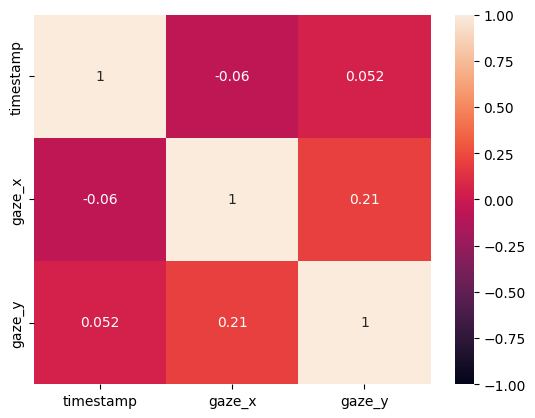

In [ ]:
dataplot_gaze = sb.heatmap(gaze_pilot_to_corr.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
gaze_pilot_data = gaze_pilot[gaze_selected]

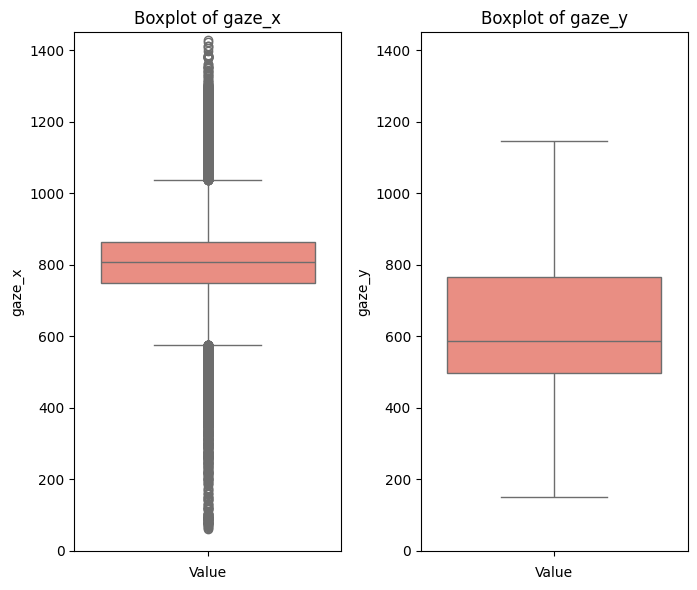

In [ ]:
plot_boxplot(gaze_pilot_data.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) + 1, 'salmon')

In [ ]:
gaze_pilot_filtered = gaze_pilot_data.copy()

In [ ]:
for column in gaze_selected:
    gaze_pilot_filtered = remove_outliers(gaze_pilot_filtered, column)

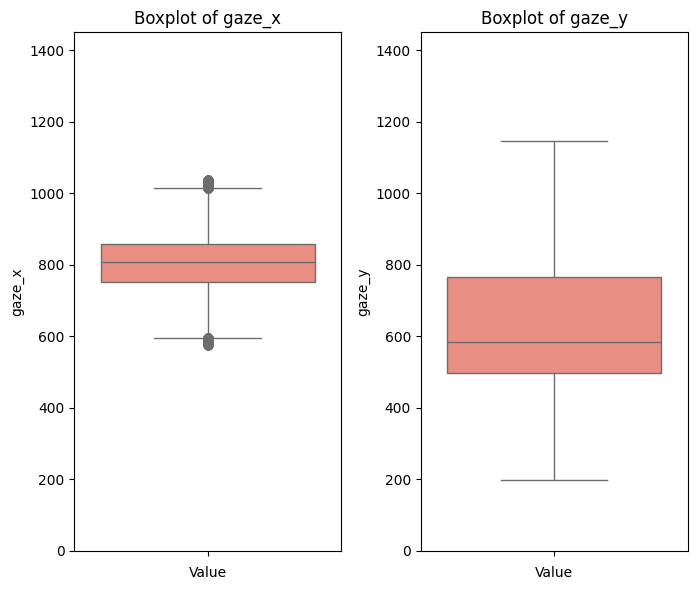

In [ ]:
plot_boxplot(gaze_pilot_filtered.iloc[:, 1:], gaze_selected[1:], len(gaze_selected) + 1, 'salmon')

### Gaze analysis

In [ ]:
gaze_pilot_filtered.shape

(63723, 3)

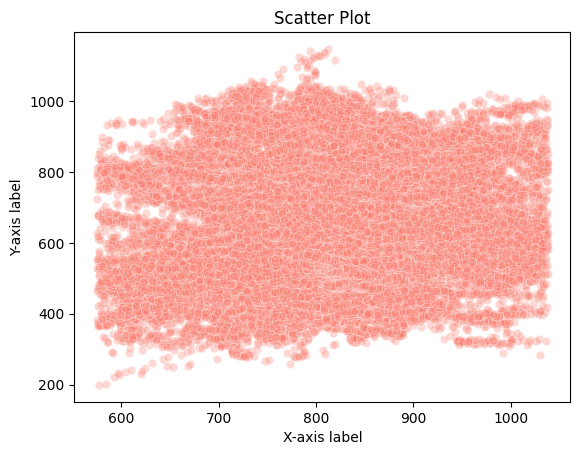

In [ ]:
scatter_plot = sb.scatterplot(data=gaze_pilot_filtered, x='gaze_x', y='gaze_y', color='salmon', alpha=0.3)
scatter_plot.set(xlabel="X-axis label", ylabel="Y-axis label", title="Scatter Plot")
plt.show()

<Figure size 1000x600 with 0 Axes>

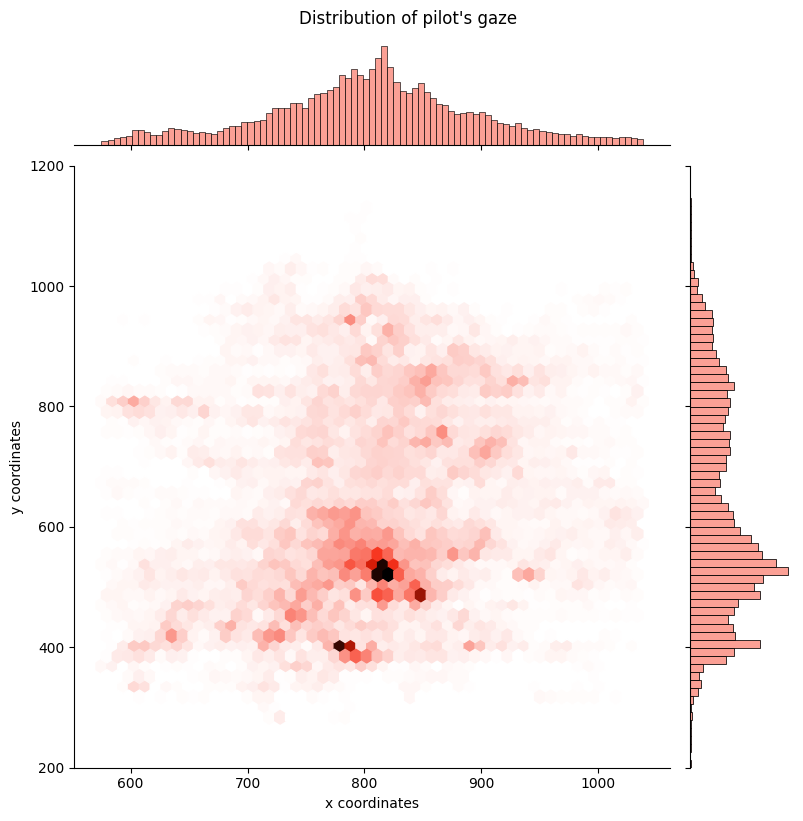

In [ ]:
plt.figure(figsize=(10, 6))
hex_plot = sb.jointplot(data=gaze_pilot_filtered, x='gaze_x', y='gaze_y', kind='hex', height=8, color='salmon')
hex_plot.set_axis_labels("x coordinates", "y coordinates")
hex_plot.fig.suptitle("Distribution of pilot's gaze", y=1.02)

hex_plot.ax_joint.set_ylim(200, 1200)
hex_plot.ax_marg_y.set_ylim(200, 1200)
plt.show()

In [ ]:
gaze_pilot_filtered['distance'] = np.sqrt((gaze_pilot_filtered['gaze_x'] - gaze_pilot_filtered['gaze_x'].shift(1)) ** 2 + (
        gaze_pilot_filtered['gaze_y'] - gaze_pilot_filtered['gaze_y'].shift(1)) ** 2)

In [ ]:
gaze_filtered = gaze_pilot_filtered.dropna()

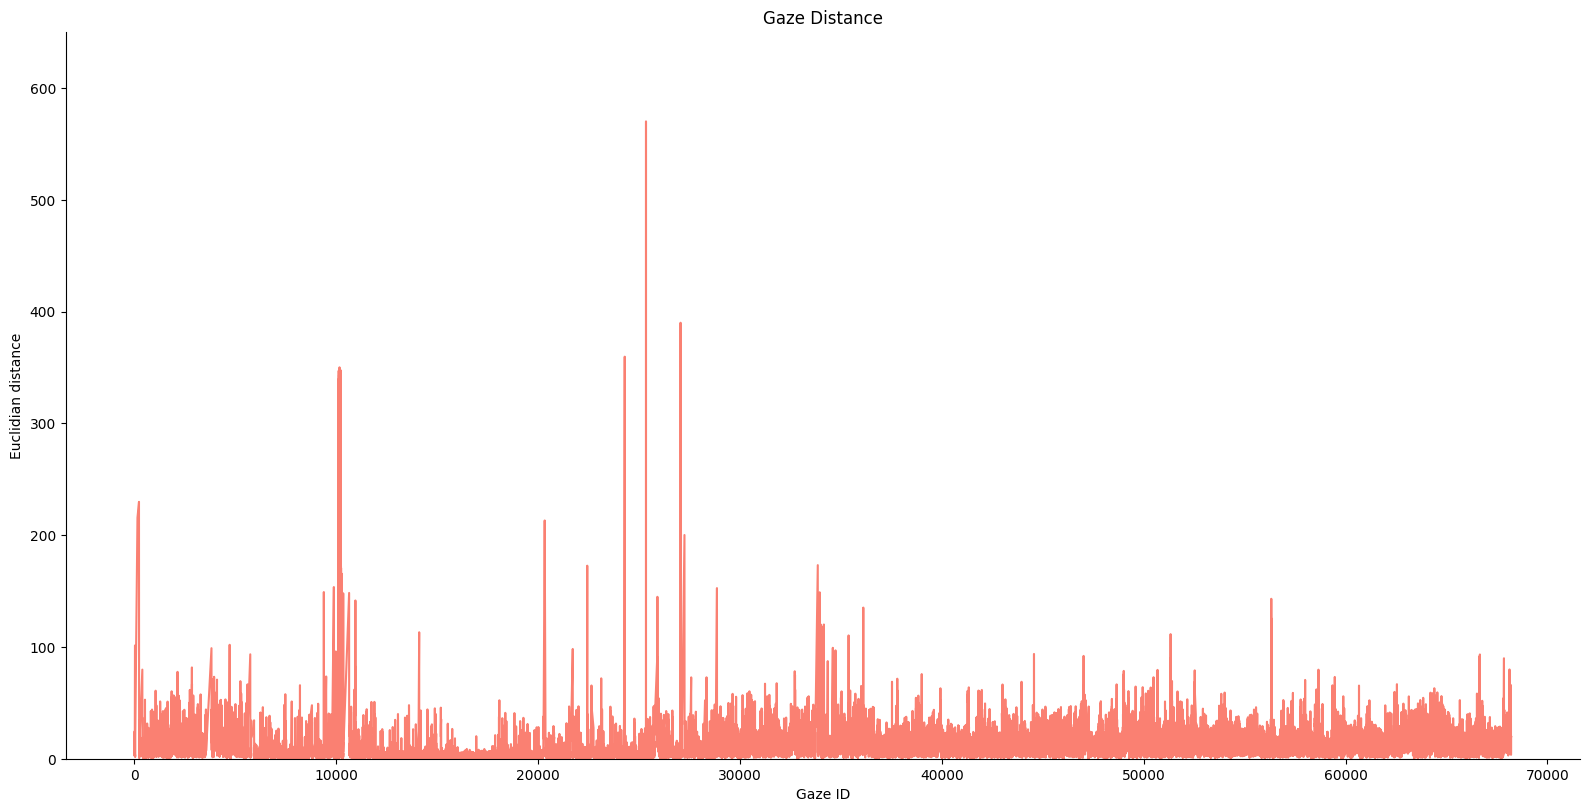

In [ ]:
plot = sb.relplot(data=gaze_pilot_filtered, x=gaze_pilot_filtered.index, y="distance", kind="line", height=8, aspect=2, color='salmon')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

In [ ]:
window_size = 60  # Adjust window size as needed
gaze_pilot_filtered['distance_smoothed'] = gaze_pilot_filtered['distance'].rolling(window=window_size).mean()

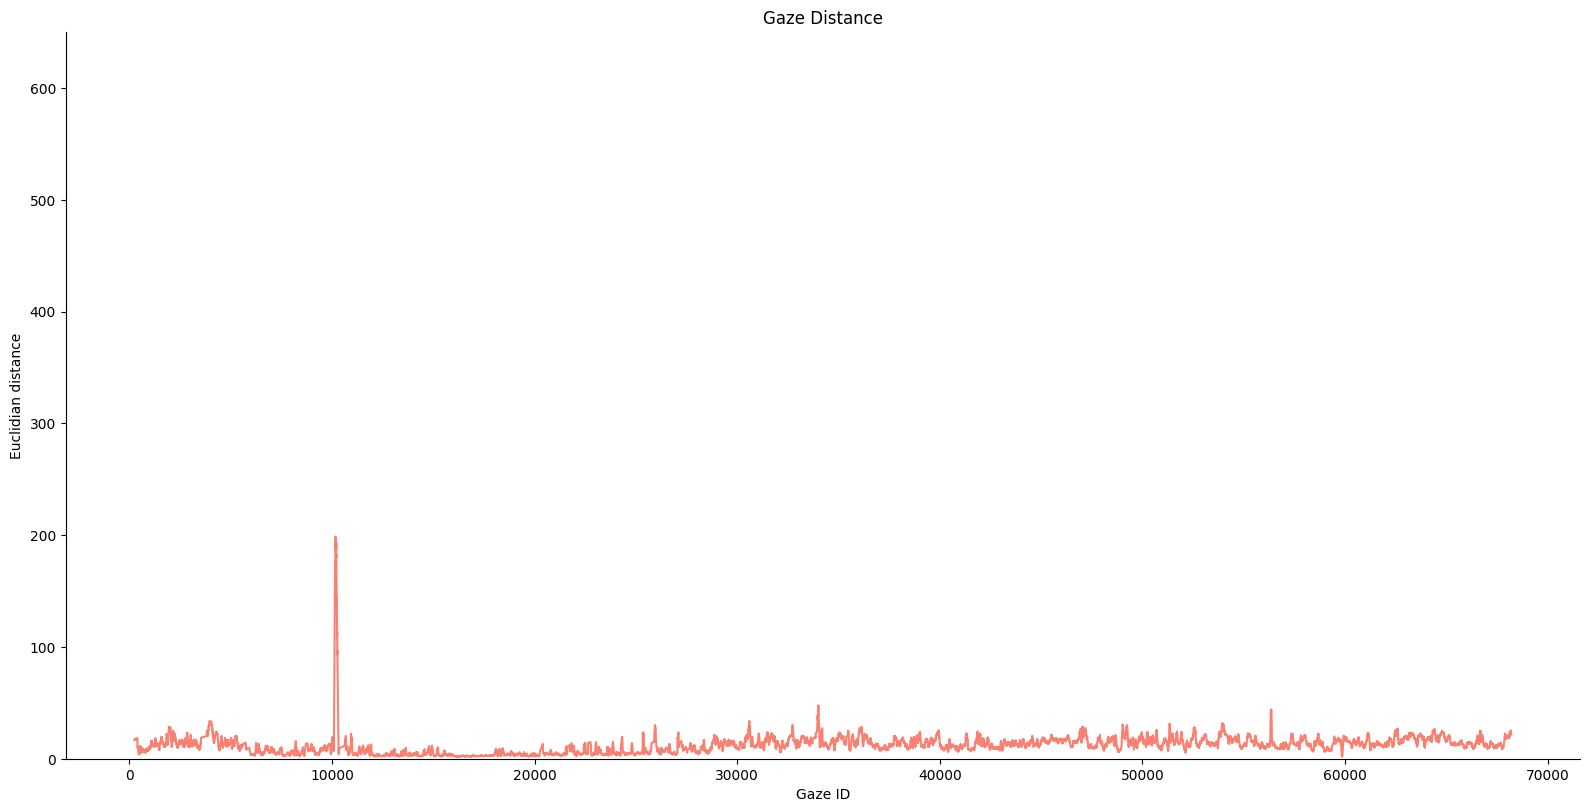

In [ ]:
plot = sb.relplot(data=gaze_pilot_filtered, x=gaze_pilot_filtered.index, y="distance_smoothed", kind="line", height=8, aspect=2, color='salmon')
plot.set(xlabel="Gaze ID", ylabel="Euclidian distance", title="Gaze Distance")
plot.ax.set_ylim(0, 650)
plt.show()

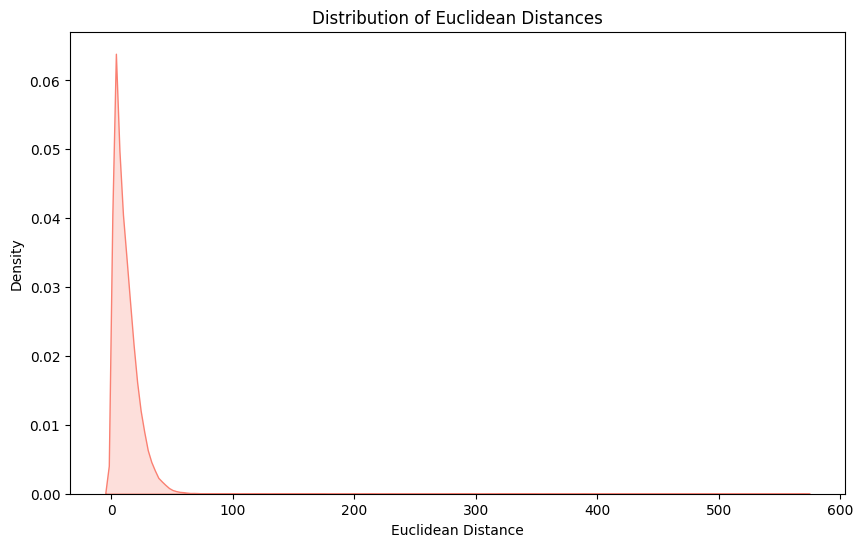

In [ ]:
plt.figure(figsize=(10, 6))
sb.kdeplot(gaze_pilot_filtered['distance'], fill=True, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Density")
plt.title("Distribution of Euclidean Distances")
plt.show()

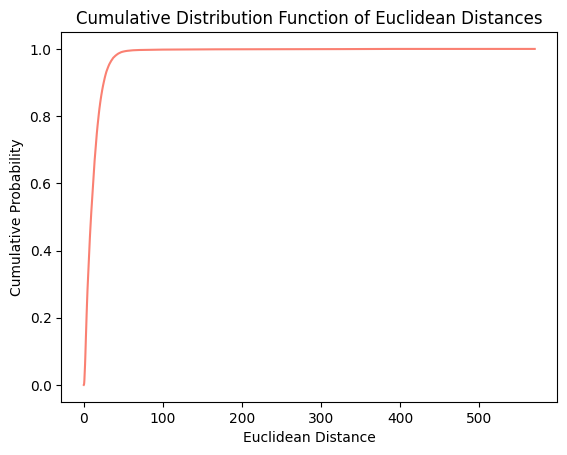

In [ ]:
sorted_data = np.sort(gaze_pilot_filtered['distance'])
cdf = np.arange(len(sorted_data)) / float(len(sorted_data) - 1)

plt.plot(sorted_data, cdf, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function of Euclidean Distances")
plt.show()

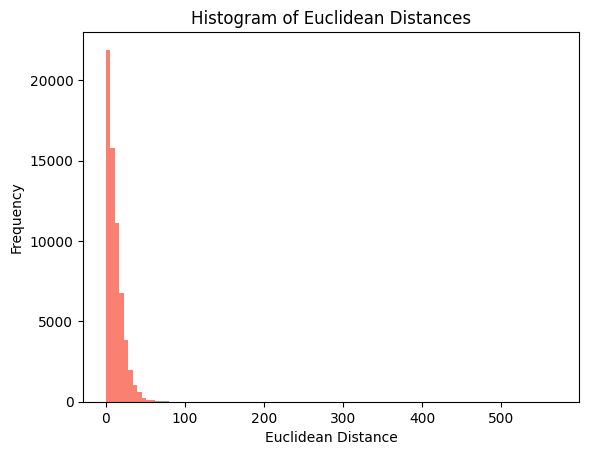

In [ ]:
plt.hist(gaze_pilot_filtered['distance'], bins=100, color='salmon')
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Euclidean Distances")
plt.show()

### Fixations

In [ ]:
fixations_pilot = pd.read_csv('fixations_narein.csv')

In [ ]:
fixations_pilot.head()

section id                          recording id  \
0  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
1  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
2  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
3  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
4  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   

   fixation id  start timestamp [ns]   end timestamp [ns]  duration [ms]  \
0            1   1718830663954517591  1718830664184778591            230   
1            2   1718830664219768591  1718830664299893591             80   
2            3   1718830664364909591  1718830664715268591            350   
3            4   1718830664770268591  1718830664850393591             80   
4            5   1718830664910393591  1718830665440893591            530   

   fixation x [px]  fixation y [px]  azimuth [deg]  elevation [deg]  
0         1012.451          673.566      13.366543        -4.057990  
1         1038.473          580.357      15.041816         1.960130  
2         1117.826          560.970      20.197481         3.175001  
3         1104.664          566.271      19.341227         2.842719  
4         1037.711          582.547      14.991610         1.819225

In [ ]:
fixations_pilot.shape

(2412, 10)

In [ ]:
fixations_pilot.columns

Index(['section id', 'recording id', 'fixation id', 'start timestamp [ns]',
       'end timestamp [ns]', 'duration [ms]', 'fixation x [px]',
       'fixation y [px]', 'azimuth [deg]', 'elevation [deg]'],
      dtype='object')

In [ ]:
column_names_fixations = {'section id' : 'section_id',
                          'recording id' : 'recording_id',
                          'fixation id' : 'fixation_id',
                          'start timestamp [ns]' : 'start_timestamp',
                          'end timestamp [ns]' : 'end_timestamp',
                          'duration [ms]' : 'duration',
                          'fixation x [px]' : 'fixation_x',
                          'fixation y [px]' : 'fixation_y',
                          'azimuth [deg]' : 'azimuth',
                          'elevation [deg]': 'elevation'}

fixations_pilot = fixations_pilot.rename(columns=column_names_fixations)

In [ ]:
fixations_pilot['start_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_pilot['start_timestamp']]
fixations_pilot['end_timestamp'] = [datetime.fromtimestamp(ts // 1000000000) for ts in fixations_pilot['end_timestamp']]

In [ ]:
fixations_pilot.head()

section_id                          recording_id  \
0  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
1  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
2  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
3  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   
4  45dedbda-204f-44af-b70b-fe31e6d89a9a  07356784-7b85-467a-9ea1-8b4ab210288e   

   fixation_id     start_timestamp       end_timestamp  duration  fixation_x  \
0            1 2024-06-19 20:57:43 2024-06-19 20:57:44       230    1012.451   
1            2 2024-06-19 20:57:44 2024-06-19 20:57:44        80    1038.473   
2            3 2024-06-19 20:57:44 2024-06-19 20:57:44       350    1117.826   
3            4 2024-06-19 20:57:44 2024-06-19 20:57:44        80    1104.664   
4            5 2024-06-19 20:57:44 2024-06-19 20:57:45       530    1037.711   

   fixation_y    azimuth  elevation  
0     673.566  13.366543  -4.057990  
1     580.357  15.041816   1.960130  
2     560.970  20.197481   3.175001  
3     566.271  19.341227   2.842719  
4     582.547  14.991610   1.819225

In [ ]:
fixations_pilot = fixations_pilot[fixations_pilot['end_timestamp'] >= datetime.strptime('2024-06-19 17:00:16', "%Y-%m-%d %H:%M:%S")].reset_index(drop=True)

In [ ]:
fixations_pilot = fixations_pilot[500:1272]

In [ ]:
to_corr = ['duration', 'fixation_x', 'fixation_y']

In [ ]:
fixations_pilot_to_corr = fixations_pilot[to_corr]

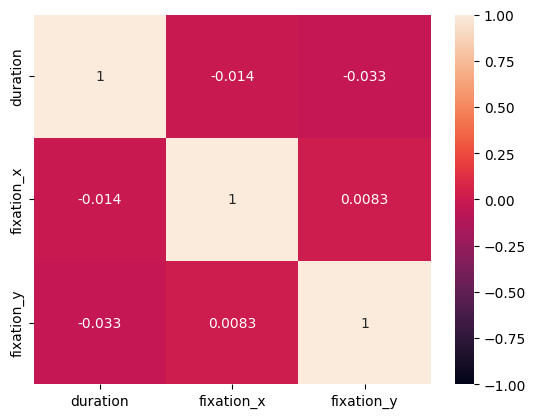

In [ ]:
dataplot_fixations = sb.heatmap(fixations_pilot_to_corr.corr(), annot=True, vmin=-1, vmax=1)

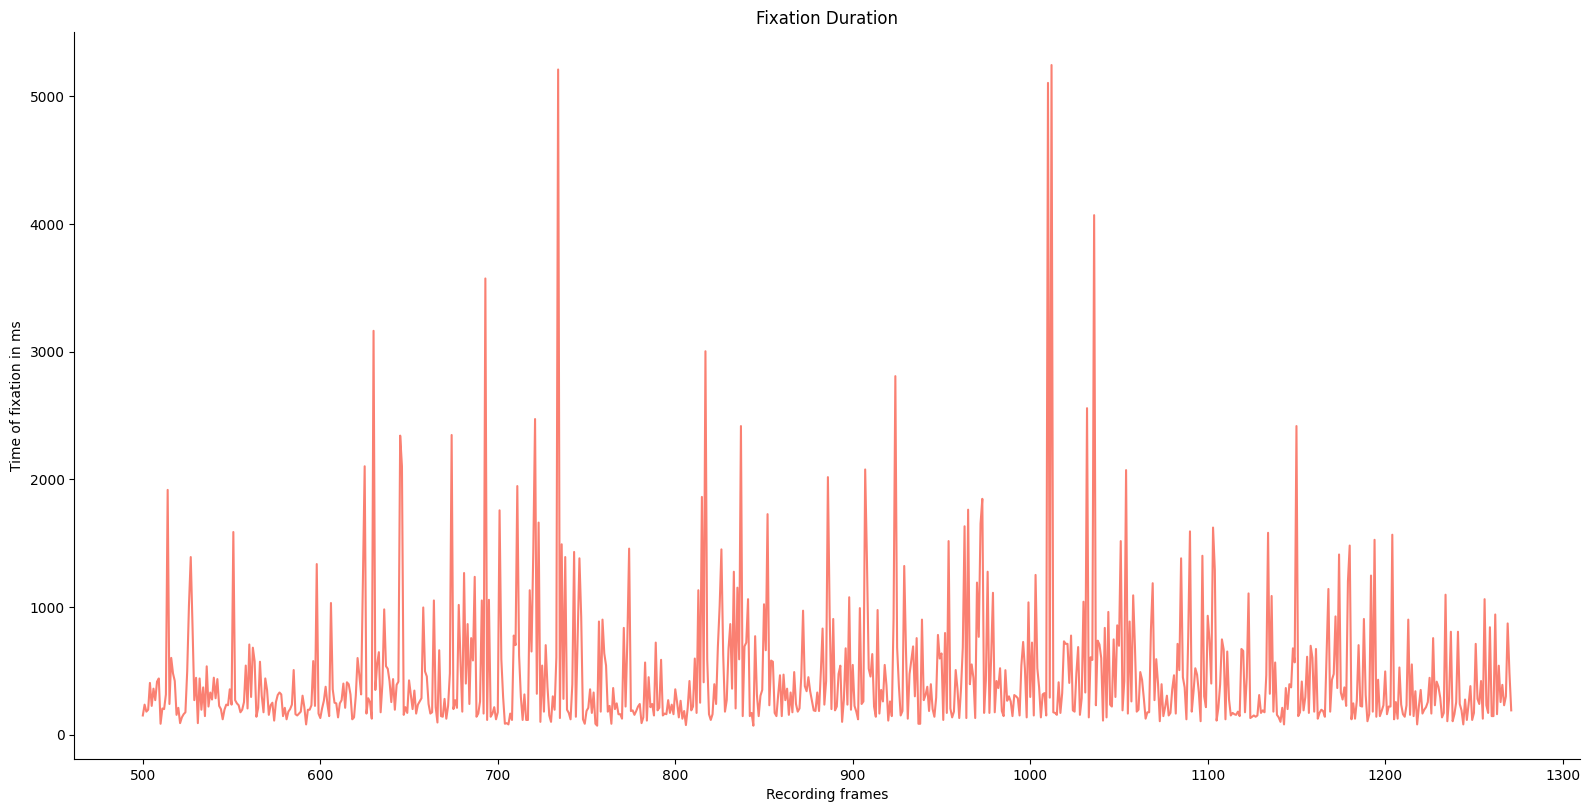

In [ ]:
g2 = sb.relplot(data=fixations_pilot, x=fixations_pilot.index, y="duration", kind="line", height=8, aspect=2,
                color='salmon')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Fixation Duration")
plt.show()

In [ ]:
window_size = 10  # Adjust window size as needed
fixations_pilot['duration_smoothed'] = fixations_pilot['duration'].rolling(window=window_size).mean()

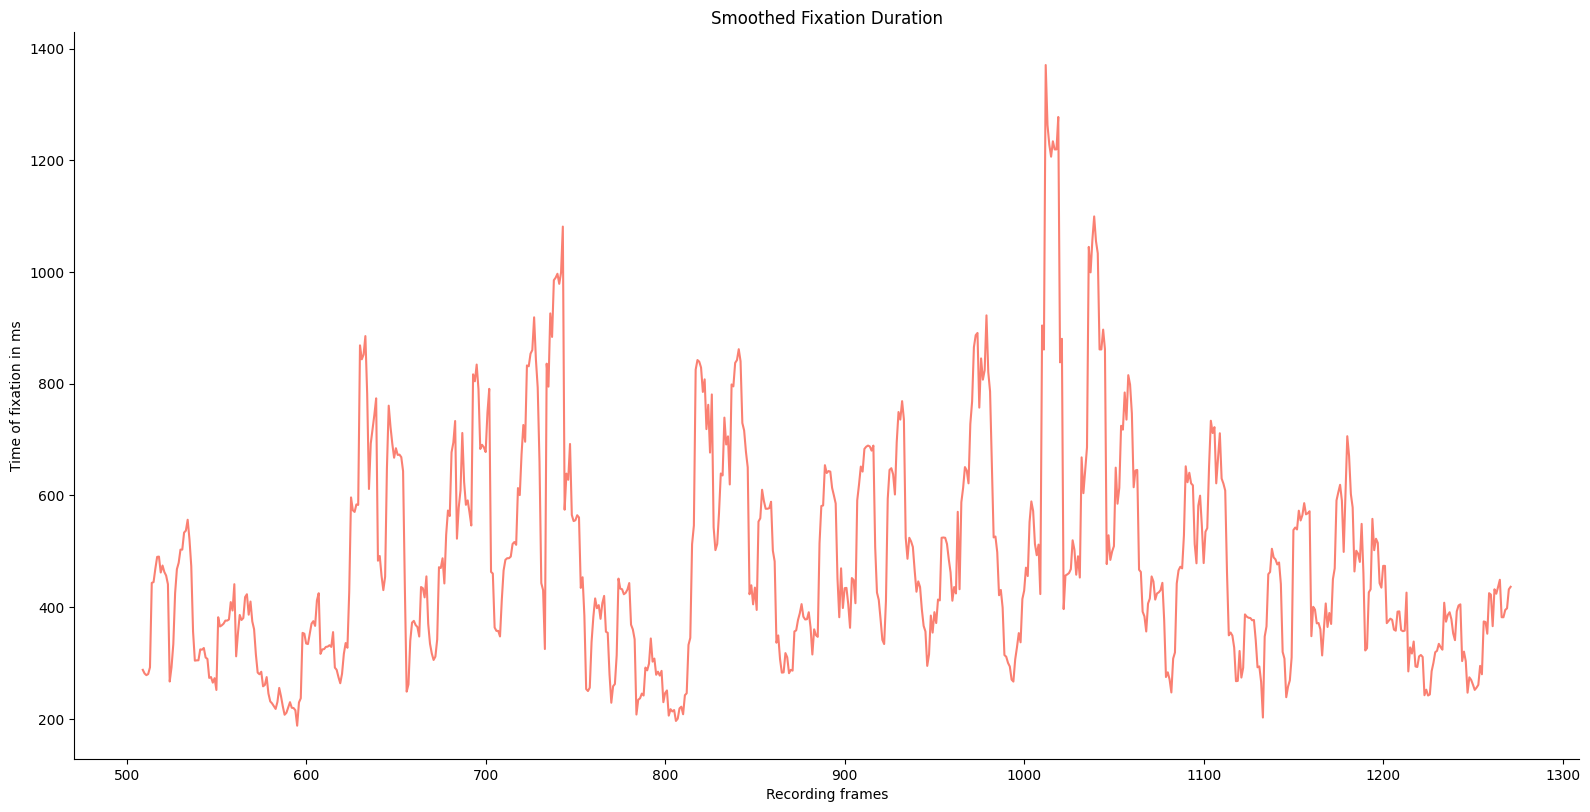

In [ ]:
g2 = sb.relplot(data=fixations_pilot, x=fixations_pilot.index, y="duration_smoothed", kind="line", height=8,
                aspect=2, color='salmon')
g2.set(xlabel="Recording frames", ylabel="Time of fixation in ms", title="Smoothed Fixation Duration")
plt.show()

### Saccades (not available)

## Hand movement

In [ ]:
hand_pilot = pd.read_csv('narein_hands.csv', low_memory=False)

In [ ]:
hand_pilot.head(-20)

Measured Measured.1     Mixed Measured.2 Measured.3 Measured.4  \
0        Frame       Time         X          Y          Z       Type   
1            1          0  1322.986   -188.148     95.932   Measured   
2            2    0.00833  1322.994   -188.155     95.931   Measured   
3            3    0.01667  1322.998   -188.151     95.932   Measured   
4            4      0.025  1323.687   -188.712      95.57   Measured   
...        ...        ...       ...        ...        ...        ...   
42752    42752  356.25833         0          0          0        NaN   
42753    42753  356.26667         0          0          0        NaN   
42754    42754    356.275         0          0          0        NaN   
42755    42755  356.28333         0          0          0        NaN   
42756    42756  356.29167         0          0          0        NaN   

        Mixed.1 Measured.5  Mixed.2 Measured.6 Measured.7 Measured.8 Mixed.3  \
0             X          Y        Z       Type          X          Y       Z   
1      1257.308     -192.5   48.753   Measured   1379.122   -144.911  83.542   
2      1257.311    -192.52   48.747   Measured   1379.123    -144.89  83.552   
3      1257.304   -192.529   48.748   Measured   1379.123   -144.889   83.56   
4      1257.302   -192.536    48.74   Measured   1378.921   -145.056  83.265   
...         ...        ...      ...        ...        ...        ...     ...   
42752  1217.648   -194.136  112.273   Measured          0          0       0   
42753  1217.182   -194.138  112.015   Measured          0          0       0   
42754  1216.628   -194.097  111.843   Measured          0          0       0   
42755  1216.043   -194.223  111.572   Measured          0          0       0   
42756  1215.511   -194.309   111.35   Measured          0          0       0   

        Mixed.4   Mixed.5   Mixed.6 Mixed.7   Mixed.8  
0          Type         X         Y       Z      Type  
1      Measured  1235.867  -118.354  36.233  Measured  
2      Measured  1235.876  -118.363  36.226  Measured  
3      Measured  1235.867   -118.37  36.231  Measured  
4      Measured  1235.828  -118.439  36.199  Measured  
...         ...       ...       ...     ...       ...  
42752       NaN  1208.556  -117.518  87.043  Measured  
42753       NaN  1208.007  -117.504  86.834  Measured  
42754       NaN  1207.447  -117.536  86.624  Measured  
42755       NaN  1206.901  -117.595  86.431  Measured  
42756       NaN  1206.367  -117.668  86.201  Measured  

[42757 rows x 18 columns]

In [ ]:
hand_pilot.columns

Index(['Measured', 'Measured.1', 'Mixed', 'Measured.2', 'Measured.3',
       'Measured.4', 'Mixed.1', 'Measured.5', 'Mixed.2', 'Measured.6',
       'Measured.7', 'Measured.8', 'Mixed.3', 'Mixed.4', 'Mixed.5', 'Mixed.6',
       'Mixed.7', 'Mixed.8'],
      dtype='object')

In [ ]:
hand_pilot_selected = hand_pilot[['Mixed.1', 'Measured.5', 'Mixed.2']].iloc[1:]
hand_pilot_selected = hand_pilot_selected.rename(columns = {'Measured.1':'time', 'Mixed.1': 'x', 'Measured.5': 'y', 'Mixed.2': 'z'})

In [ ]:
hand_pilot_selected.head(20)

x         y       z
1   1257.308    -192.5  48.753
2   1257.311   -192.52  48.747
3   1257.304  -192.529  48.748
4   1257.302  -192.536   48.74
5   1257.294  -192.516  48.739
6   1257.303  -192.508  48.721
7     1257.3  -192.521  48.732
8   1257.304  -192.547  48.728
9   1257.313  -192.563  48.727
10  1257.302  -192.553   48.72
11  1257.295   -192.56  48.712
12  1257.284   -192.53  48.714
13  1257.295  -192.543    48.7
14   1257.29   -192.53  48.697
15  1257.299   -192.52  48.685
16  1257.287  -192.489  48.677
17  1257.299  -192.455  48.684
18  1257.294  -192.466  48.676
19  1257.301  -192.469   48.68
20  1257.302  -192.468  48.666

In [ ]:
hand_pilot_selected.describe()

x         y       z
count      42776     42776   42776
unique     20059     23031   31003
top     1266.046  -191.867  87.805
freq          20        17      12

In [ ]:
hand_pilot_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42776 entries, 1 to 42776
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x       42776 non-null  object
 1   y       42776 non-null  object
 2   z       42776 non-null  object
dtypes: object(3)
memory usage: 1002.7+ KB


In [ ]:
hand_pilot_selected['x'] = pd.to_numeric(hand_pilot_selected['x'], errors='coerce')
hand_pilot_selected['y'] = pd.to_numeric(hand_pilot_selected['y'], errors='coerce')
hand_pilot_selected['z'] = pd.to_numeric(hand_pilot_selected['z'], errors='coerce')

In [ ]:
hand_pilot_grouped = hand_pilot_selected.groupby(hand_pilot_selected.index // 14).mean()

# Adjust the 'Time' column separately to represent the start of each interval
# df_grouped['Time'] = hand_pilot_selected.groupby(hand_pilot_selected.index // 14)['Time'].first().values

In [ ]:
hand_pilot_grouped

x           y           z
0     1257.301154 -192.532769   48.729308
1     1257.294214 -192.456857   48.666214
2     1257.262643 -192.381500   48.656500
3     1257.266643 -192.410714   48.622571
4     1257.276643 -192.484071   48.655000
...           ...         ...         ...
3051  1242.008500 -196.682143  118.145214
3052  1231.092143 -195.511000  115.341500
3053  1220.102071 -194.166357  113.024786
3054  1214.026143 -194.442429  109.326429
3055  1042.763571 -166.690714   90.447714

[3056 rows x 3 columns]

# Compare non pilot vs pilot

this section is used to combine plots for pilot and non-pilot.

### Significant difference in gaze_x range

In [ ]:
alpha = 0.05

In [ ]:
def significant_difference(data_non_pilot, data_pilot):
    stat1, p1 = shapiro(data_non_pilot)
    stat2, p2 = shapiro(data_pilot)

    if p1 > alpha and p2 > alpha:
        t_stat, t_p = ttest_ind(data_non_pilot, data_pilot)
        print(f't-test: Statistics={t_stat}, p-value={t_p}')

        if t_p < alpha:
            print("There is a statistically significant difference between the two datasets.")
        else:
            print("There is no statistically significant difference between the two datasets.")

    else:
        u_stat, u_p = mannwhitneyu(data_non_pilot, data_pilot)
        # precise_u_p = Decimal(u_p)
        print(f'Mann-Whitney U Test: Statistics={u_stat}, p-value={u_p}')

        if u_p < alpha:
            print("There is a statistically significant difference between the two datasets.")
        else:
            print("There is no statistically significant difference between the two datasets.")

In [ ]:
significant_difference(gaze_non_pilot_data['gaze_x'].iloc[:5000], gaze_pilot_data['gaze_x'].iloc[:5000])

Mann-Whitney U Test: Statistics=8100375.5, p-value=4.803204870127319e-204
There is a statistically significant difference between the two datasets.


### Significant difference in gaze_y range

In [ ]:
significant_difference(gaze_non_pilot_data['gaze_y'].iloc[:5000], gaze_pilot_data['gaze_y'].iloc[:5000])

Mann-Whitney U Test: Statistics=17083759.0, p-value=2.6555936413591465e-221
There is a statistically significant difference between the two datasets.


### Plots for the euclidian distance

In [ ]:
gaze_pilot_to_concat = copy.deepcopy(gaze_pilot_filtered)
gaze_pilot_to_concat['Pilot Type'] = 'Pilot'

In [ ]:
gaze_pilot_to_concat.dropna().reset_index(drop=False)

index           timestamp   gaze_x   gaze_y   distance  \
0        258 2024-06-19 20:57:45  918.033  581.156   8.027393   
1        259 2024-06-19 20:57:45  906.838  576.949  11.959384   
2        260 2024-06-19 20:57:45  899.710  565.678  13.335810   
3        261 2024-06-19 20:57:45  886.361  560.004  14.504829   
4        262 2024-06-19 20:57:45  891.679  568.204   9.773491   
...      ...                 ...      ...      ...        ...   
63658  68197 2024-06-19 21:03:26  592.757  569.029  20.267856   
63659  68198 2024-06-19 21:03:26  604.443  577.792  14.606600   
63660  68199 2024-06-19 21:03:26  589.181  579.043  15.313185   
63661  68200 2024-06-19 21:03:26  600.787  585.026  13.057393   
63662  68201 2024-06-19 21:03:26  620.759  584.423  19.981101   

       distance_smoothed Pilot Type  
0              16.523857      Pilot  
1              16.636999      Pilot  
2              16.807335      Pilot  
3              16.973595      Pilot  
4              16.825934      Pilot  
...                  ...        ...  
63658          22.119615      Pilot  
63659          22.223730      Pilot  
63660          22.396363      Pilot  
63661          22.097770      Pilot  
63662          21.702068      Pilot  

[63663 rows x 7 columns]

In [ ]:
gaze_pilot_to_concat.shape

(63723, 6)

In [ ]:
gaze_non_pilot_to_concat = copy.deepcopy(gaze_non_pilot_filtered)
gaze_non_pilot_to_concat['Pilot Type'] = 'Non–Pilot'

In [ ]:
gaze_pilot_to_concat = gaze_pilot_to_concat[10000:60000]

In [ ]:
gaze_non_pilot_to_concat.dropna().reset_index(drop=False)

index           timestamp   gaze_x   gaze_y   distance  \
0         60 2024-05-23 15:45:24  675.593  945.927  24.660578   
1         61 2024-05-23 15:45:24  710.670  960.945  38.156733   
2         62 2024-05-23 15:45:24  681.858  952.012  30.165043   
3         63 2024-05-23 15:45:24  704.822  969.831  29.066511   
4         64 2024-05-23 15:45:24  694.079  959.279  15.058445   
...      ...                 ...      ...      ...        ...   
65918  68197 2024-05-23 15:51:07  695.387  771.016   8.885456   
65919  68198 2024-05-23 15:51:07  693.331  777.473   6.776429   
65920  68199 2024-05-23 15:51:07  693.994  777.781   0.731049   
65921  68200 2024-05-23 15:51:07  693.009  778.999   1.566445   
65922  68201 2024-05-23 15:51:07  692.589  782.632   3.657197   

       distance_smoothed Pilot Type  
0              48.320363  Non–Pilot  
1              48.041369  Non–Pilot  
2              47.514064  Non–Pilot  
3              47.064029  Non–Pilot  
4              46.366788  Non–Pilot  
...                  ...        ...  
65918          38.557657  Non–Pilot  
65919          35.208302  Non–Pilot  
65920          35.196468  Non–Pilot  
65921          35.111687  Non–Pilot  
65922          31.911172  Non–Pilot  

[65923 rows x 7 columns]

In [ ]:
gaze_non_pilot_to_concat.shape

(65982, 6)

In [ ]:
gaze_non_pilot_to_concat = gaze_non_pilot_to_concat[10000:60000]

In [ ]:
combined_data = pd.concat([gaze_pilot_to_concat, gaze_non_pilot_to_concat]).reset_index(inplace=False)
combined_data.dropna()

index           timestamp    gaze_x    gaze_y   distance  \
0      11978 2024-06-19 20:58:44   753.972   468.693   2.844138   
1      11979 2024-06-19 20:58:44   755.723   471.877   3.633711   
2      11980 2024-06-19 20:58:44   757.275   467.247   4.883196   
3      11981 2024-06-19 20:58:44   757.645   468.513   1.318960   
4      11982 2024-06-19 20:58:44   755.987   464.374   4.458731   
...      ...                 ...       ...       ...        ...   
99995  62191 2024-05-23 15:50:36  1051.931  1001.190  18.306496   
99996  62192 2024-05-23 15:50:36  1051.264   997.769   3.485417   
99997  62193 2024-05-23 15:50:36  1044.196  1005.835  10.724597   
99998  62194 2024-05-23 15:50:36  1019.479   997.761  26.002299   
99999  62195 2024-05-23 15:50:36  1020.202   968.058  29.711798   

       distance_smoothed Pilot Type  
0               5.042511      Pilot  
1               5.021505      Pilot  
2               5.050703      Pilot  
3               4.990385      Pilot  
4               4.991321      Pilot  
...                  ...        ...  
99995          21.743236  Non–Pilot  
99996          21.730406  Non–Pilot  
99997          21.767397  Non–Pilot  
99998          22.151905  Non–Pilot  
99999          22.404496  Non–Pilot  

[100000 rows x 7 columns]

<Figure size 500x400 with 0 Axes>

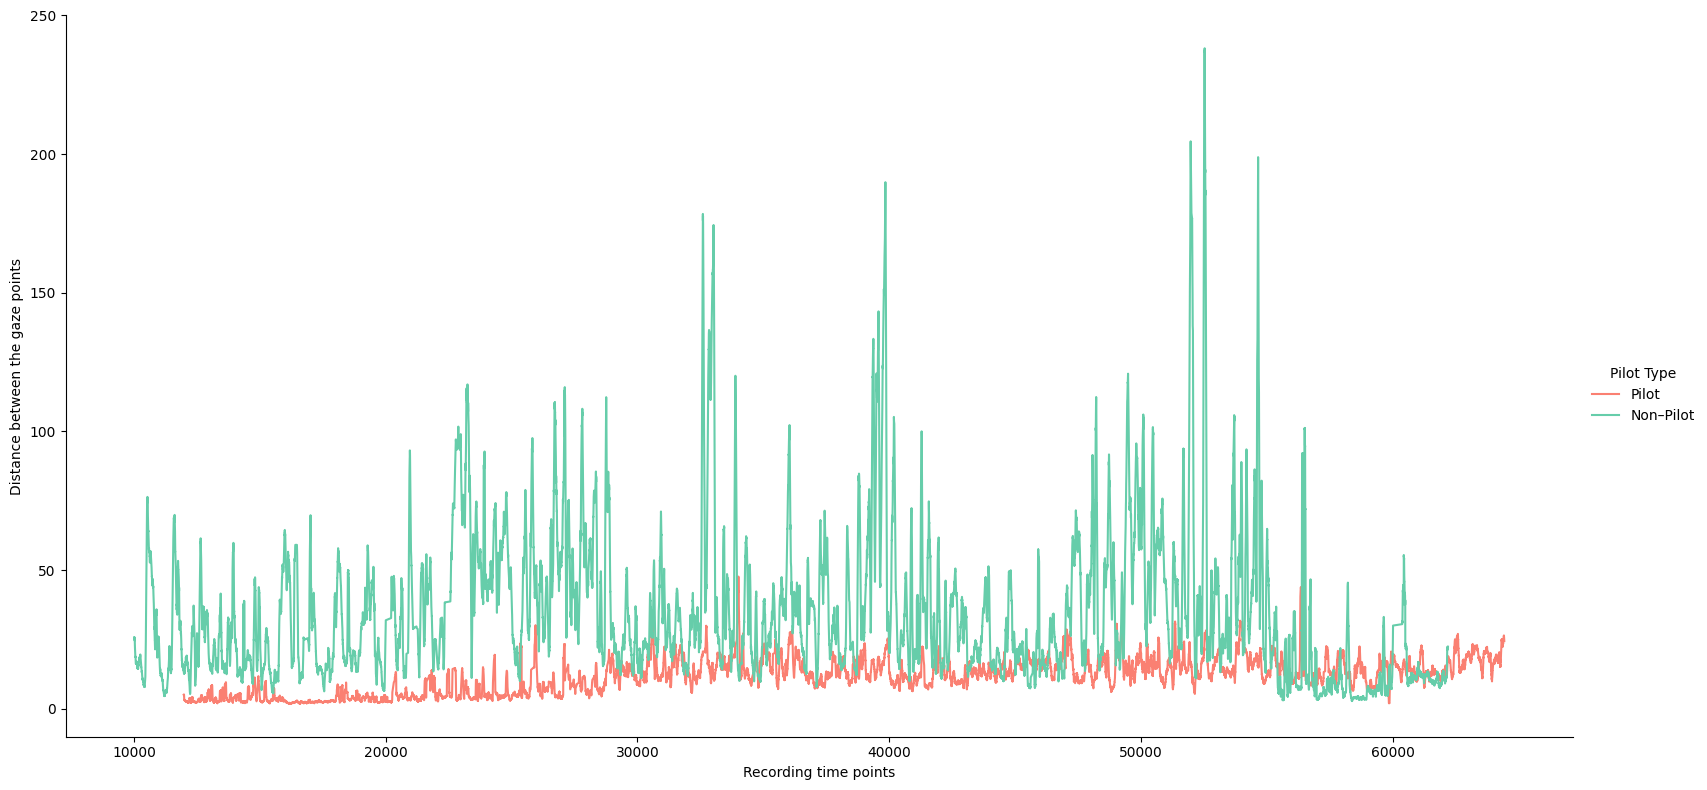

In [ ]:
plt.figure(figsize=(5, 4))
plot = sb.relplot(data=combined_data, x=combined_data['index'], y="distance_smoothed", hue='Pilot Type', kind="line", height=8, aspect=2, palette={'Pilot': 'salmon', 'Non–Pilot': 'mediumaquamarine'})
plot.set(xlabel="Recording time points", ylabel="Distance between the gaze points", title="") # Set y-axis limits if needed

plt.show()

### Histograms of euclidian distances

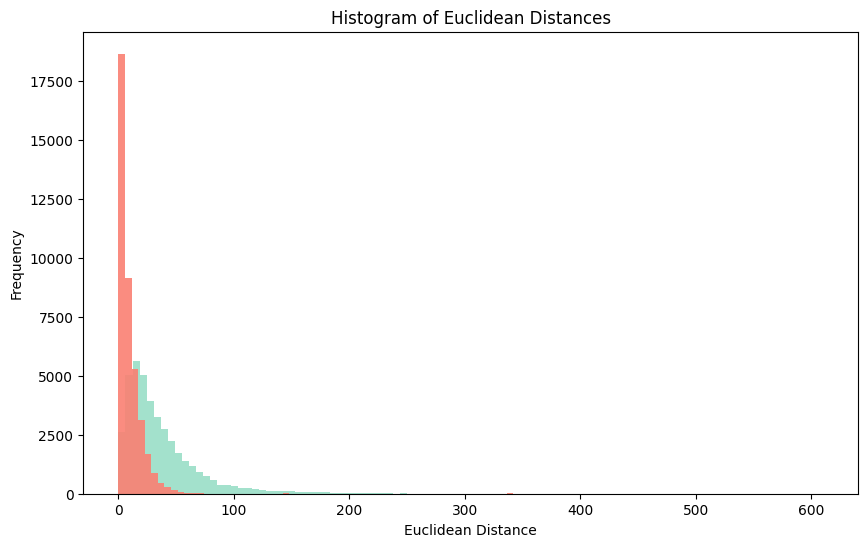

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(gaze_non_pilot_filtered['distance'].iloc[:40000], bins=100, color='mediumaquamarine', alpha=0.6, label='Non-Pilot')
ax.hist(gaze_pilot_filtered['distance'].iloc[:40000], bins=100, color='salmon', alpha=0.9, label='Pilot')


# Adding labels and title
ax.set_xlabel("Euclidean Distance")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Euclidean Distances")
plt.show()

### Significant difference in distance

In [ ]:
significant_difference(gaze_non_pilot_filtered['distance'].iloc[1000:2000], gaze_pilot_filtered['distance'].iloc[1000:2000])

Mann-Whitney U Test: Statistics=691031.0, p-value=1.614346809691948e-49
There is a statistically significant difference between the two datasets.


### Plots for fixations

In [ ]:
fixations_pilot_to_concat = copy.deepcopy(fixations_pilot).reset_index(drop=True)
fixations_pilot_to_concat['Pilot Type'] = 'Pilot'

In [ ]:
fixations_pilot_to_concat

section_id  \
0    45dedbda-204f-44af-b70b-fe31e6d89a9a   
1    45dedbda-204f-44af-b70b-fe31e6d89a9a   
2    45dedbda-204f-44af-b70b-fe31e6d89a9a   
3    45dedbda-204f-44af-b70b-fe31e6d89a9a   
4    45dedbda-204f-44af-b70b-fe31e6d89a9a   
..                                    ...   
767  45dedbda-204f-44af-b70b-fe31e6d89a9a   
768  45dedbda-204f-44af-b70b-fe31e6d89a9a   
769  45dedbda-204f-44af-b70b-fe31e6d89a9a   
770  45dedbda-204f-44af-b70b-fe31e6d89a9a   
771  45dedbda-204f-44af-b70b-fe31e6d89a9a   

                             recording_id  fixation_id     start_timestamp  \
0    07356784-7b85-467a-9ea1-8b4ab210288e          501 2024-06-19 21:01:21   
1    07356784-7b85-467a-9ea1-8b4ab210288e          502 2024-06-19 21:01:21   
2    07356784-7b85-467a-9ea1-8b4ab210288e          503 2024-06-19 21:01:22   
3    07356784-7b85-467a-9ea1-8b4ab210288e          504 2024-06-19 21:01:22   
4    07356784-7b85-467a-9ea1-8b4ab210288e          505 2024-06-19 21:01:22   
..                                    ...          ...                 ...   
767  07356784-7b85-467a-9ea1-8b4ab210288e         1268 2024-06-19 21:08:18   
768  07356784-7b85-467a-9ea1-8b4ab210288e         1269 2024-06-19 21:08:18   
769  07356784-7b85-467a-9ea1-8b4ab210288e         1270 2024-06-19 21:08:18   
770  07356784-7b85-467a-9ea1-8b4ab210288e         1271 2024-06-19 21:08:19   
771  07356784-7b85-467a-9ea1-8b4ab210288e         1272 2024-06-19 21:08:20   

          end_timestamp  duration  fixation_x  fixation_y   azimuth  \
0   2024-06-19 21:01:21       150     879.431     487.435  4.708141   
1   2024-06-19 21:01:22       235     833.809     701.253  1.706713   
2   2024-06-19 21:01:22       180     793.973     754.603 -0.906470   
3   2024-06-19 21:01:22       195     778.388     625.553 -1.918350   
4   2024-06-19 21:01:22       405     764.318     621.414 -2.836832   
..                  ...       ...         ...         ...       ...   
767 2024-06-19 21:08:18       230     854.904     497.024  3.094587   
768 2024-06-19 21:08:18       300     801.658     485.493 -0.400225   
769 2024-06-19 21:08:19       871     838.458     511.498  2.012714   
770 2024-06-19 21:08:20       485     905.519     562.136  6.388383   
771 2024-06-19 21:08:20       190     779.499     581.152 -1.846257   

     elevation  duration_smoothed Pilot Type  
0     8.042214                NaN      Pilot  
1    -5.908761                NaN      Pilot  
2    -9.386789                NaN      Pilot  
3    -0.965730                NaN      Pilot  
4    -0.695159                NaN      Pilot  
..         ...                ...        ...  
767   7.423358              381.7      Pilot  
768   8.178706              394.7      Pilot  
769   6.481832              397.7      Pilot  
770   3.169769              431.7      Pilot  
771   1.934578              436.2      Pilot  

[772 rows x 12 columns]

In [ ]:
fixations_pilot_to_concat = fixations_pilot_to_concat.dropna().reset_index(drop=True)

In [ ]:
fixations_pilot_to_concat

section_id  \
0    45dedbda-204f-44af-b70b-fe31e6d89a9a   
1    45dedbda-204f-44af-b70b-fe31e6d89a9a   
2    45dedbda-204f-44af-b70b-fe31e6d89a9a   
3    45dedbda-204f-44af-b70b-fe31e6d89a9a   
4    45dedbda-204f-44af-b70b-fe31e6d89a9a   
..                                    ...   
758  45dedbda-204f-44af-b70b-fe31e6d89a9a   
759  45dedbda-204f-44af-b70b-fe31e6d89a9a   
760  45dedbda-204f-44af-b70b-fe31e6d89a9a   
761  45dedbda-204f-44af-b70b-fe31e6d89a9a   
762  45dedbda-204f-44af-b70b-fe31e6d89a9a   

                             recording_id  fixation_id     start_timestamp  \
0    07356784-7b85-467a-9ea1-8b4ab210288e          510 2024-06-19 21:01:24   
1    07356784-7b85-467a-9ea1-8b4ab210288e          511 2024-06-19 21:01:24   
2    07356784-7b85-467a-9ea1-8b4ab210288e          512 2024-06-19 21:01:25   
3    07356784-7b85-467a-9ea1-8b4ab210288e          513 2024-06-19 21:01:25   
4    07356784-7b85-467a-9ea1-8b4ab210288e          514 2024-06-19 21:01:25   
..                                    ...          ...                 ...   
758  07356784-7b85-467a-9ea1-8b4ab210288e         1268 2024-06-19 21:08:18   
759  07356784-7b85-467a-9ea1-8b4ab210288e         1269 2024-06-19 21:08:18   
760  07356784-7b85-467a-9ea1-8b4ab210288e         1270 2024-06-19 21:08:18   
761  07356784-7b85-467a-9ea1-8b4ab210288e         1271 2024-06-19 21:08:19   
762  07356784-7b85-467a-9ea1-8b4ab210288e         1272 2024-06-19 21:08:20   

          end_timestamp  duration  fixation_x  fixation_y   azimuth  \
0   2024-06-19 21:01:24       440     790.058     606.145 -1.156253   
1   2024-06-19 21:01:24        85     799.930     690.395 -0.512473   
2   2024-06-19 21:01:25       205     791.300     683.453 -1.076965   
3   2024-06-19 21:01:25       200     792.502     688.060 -0.998573   
4   2024-06-19 21:01:25       315     766.938     608.348 -2.665723   
..                  ...       ...         ...         ...       ...   
758 2024-06-19 21:08:18       230     854.904     497.024  3.094587   
759 2024-06-19 21:08:18       300     801.658     485.493 -0.400225   
760 2024-06-19 21:08:19       871     838.458     511.498  2.012714   
761 2024-06-19 21:08:20       485     905.519     562.136  6.388383   
762 2024-06-19 21:08:20       190     779.499     581.152 -1.846257   

     elevation  duration_smoothed Pilot Type  
0     0.302132              287.5      Pilot  
1    -5.200779              281.0      Pilot  
2    -4.747277              278.0      Pilot  
3    -5.048056              280.0      Pilot  
4     0.158123              292.0      Pilot  
..         ...                ...        ...  
758   7.423358              381.7      Pilot  
759   8.178706              394.7      Pilot  
760   6.481832              397.7      Pilot  
761   3.169769              431.7      Pilot  
762   1.934578              436.2      Pilot  

[763 rows x 12 columns]

In [ ]:
fixations_pilot_to_concat.shape

(763, 12)

In [ ]:
fixations_non_pilot_to_concat = copy.deepcopy(fixations_non_pilot)
fixations_non_pilot_to_concat['Pilot Type'] = 'Non–Pilot'

In [ ]:
fixations_non_pilot_to_concat

section_id  \
0    ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
1    ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
2    ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
3    ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
4    ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
..                                    ...   
768  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
769  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
770  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
771  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
772  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   

                             recording_id  fixation_id     start_timestamp  \
0    17ba065b-fe2d-409d-9cc9-6b750ba4a306            1 2024-05-23 15:45:24   
1    17ba065b-fe2d-409d-9cc9-6b750ba4a306            2 2024-05-23 15:45:24   
2    17ba065b-fe2d-409d-9cc9-6b750ba4a306            3 2024-05-23 15:45:24   
3    17ba065b-fe2d-409d-9cc9-6b750ba4a306            4 2024-05-23 15:45:24   
4    17ba065b-fe2d-409d-9cc9-6b750ba4a306            5 2024-05-23 15:45:25   
..                                    ...          ...                 ...   
768  17ba065b-fe2d-409d-9cc9-6b750ba4a306          769 2024-05-23 15:51:05   
769  17ba065b-fe2d-409d-9cc9-6b750ba4a306          770 2024-05-23 15:51:05   
770  17ba065b-fe2d-409d-9cc9-6b750ba4a306          771 2024-05-23 15:51:05   
771  17ba065b-fe2d-409d-9cc9-6b750ba4a306          772 2024-05-23 15:51:06   
772  17ba065b-fe2d-409d-9cc9-6b750ba4a306          773 2024-05-23 15:51:07   

          end_timestamp  duration  fixation_x  fixation_y   azimuth  \
0   2024-05-23 15:45:24       125     680.147     962.668 -8.739473   
1   2024-05-23 15:45:24       165     693.138     959.517 -7.843286   
2   2024-05-23 15:45:24       110     681.388     952.014 -8.627948   
3   2024-05-23 15:45:25       455     675.707     951.455 -9.013979   
4   2024-05-23 15:45:26       980     709.981     995.429 -6.765663   
..                  ...       ...         ...         ...       ...   
768 2024-05-23 15:51:05       155     752.984     714.266 -3.590254   
769 2024-05-23 15:51:05       105     730.914     782.459 -5.071103   
770 2024-05-23 15:51:06       130     700.899     781.036 -7.048402   
771 2024-05-23 15:51:07       550     693.023     777.399 -7.563654   
772 2024-05-23 15:51:07       170     695.208     774.739 -7.417352   

     elevation  duration_smoothed Pilot Type  
0   -22.766109                NaN  Non–Pilot  
1   -22.582656                NaN  Non–Pilot  
2   -22.083784                NaN  Non–Pilot  
3   -22.039280                NaN  Non–Pilot  
4   -24.913040                NaN  Non–Pilot  
..         ...                ...        ...  
768  -6.752315              265.5  Non–Pilot  
769 -11.181129              256.0  Non–Pilot  
770 -11.071708              248.0  Non–Pilot  
771 -10.830697              295.0  Non–Pilot  
772 -10.659696              284.0  Non–Pilot  

[773 rows x 12 columns]

In [ ]:
fixations_non_pilot_to_concat = fixations_non_pilot_to_concat[:-1]

In [ ]:
fixations_non_pilot_to_concat = fixations_non_pilot_to_concat.dropna().reset_index(drop=False)

In [ ]:
fixations_non_pilot_to_concat.shape

(763, 13)

In [ ]:
combined_data = pd.concat([fixations_pilot_to_concat, fixations_non_pilot_to_concat]).reset_index(drop=False)

In [ ]:
combined_data

level_0                            section_id  \
0           0  45dedbda-204f-44af-b70b-fe31e6d89a9a   
1           1  45dedbda-204f-44af-b70b-fe31e6d89a9a   
2           2  45dedbda-204f-44af-b70b-fe31e6d89a9a   
3           3  45dedbda-204f-44af-b70b-fe31e6d89a9a   
4           4  45dedbda-204f-44af-b70b-fe31e6d89a9a   
...       ...                                   ...   
1521      758  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
1522      759  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
1523      760  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
1524      761  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   
1525      762  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8   

                              recording_id  fixation_id     start_timestamp  \
0     07356784-7b85-467a-9ea1-8b4ab210288e          510 2024-06-19 21:01:24   
1     07356784-7b85-467a-9ea1-8b4ab210288e          511 2024-06-19 21:01:24   
2     07356784-7b85-467a-9ea1-8b4ab210288e          512 2024-06-19 21:01:25   
3     07356784-7b85-467a-9ea1-8b4ab210288e          513 2024-06-19 21:01:25   
4     07356784-7b85-467a-9ea1-8b4ab210288e          514 2024-06-19 21:01:25   
...                                    ...          ...                 ...   
1521  17ba065b-fe2d-409d-9cc9-6b750ba4a306          768 2024-05-23 15:51:05   
1522  17ba065b-fe2d-409d-9cc9-6b750ba4a306          769 2024-05-23 15:51:05   
1523  17ba065b-fe2d-409d-9cc9-6b750ba4a306          770 2024-05-23 15:51:05   
1524  17ba065b-fe2d-409d-9cc9-6b750ba4a306          771 2024-05-23 15:51:05   
1525  17ba065b-fe2d-409d-9cc9-6b750ba4a306          772 2024-05-23 15:51:06   

           end_timestamp  duration  fixation_x  fixation_y   azimuth  \
0    2024-06-19 21:01:24       440     790.058     606.145 -1.156253   
1    2024-06-19 21:01:24        85     799.930     690.395 -0.512473   
2    2024-06-19 21:01:25       205     791.300     683.453 -1.076965   
3    2024-06-19 21:01:25       200     792.502     688.060 -0.998573   
4    2024-06-19 21:01:25       315     766.938     608.348 -2.665723   
...                  ...       ...         ...         ...       ...   
1521 2024-05-23 15:51:05       130     707.499     748.185 -6.588493   
1522 2024-05-23 15:51:05       155     752.984     714.266 -3.590254   
1523 2024-05-23 15:51:05       105     730.914     782.459 -5.071103   
1524 2024-05-23 15:51:06       130     700.899     781.036 -7.048402   
1525 2024-05-23 15:51:07       550     693.023     777.399 -7.563654   

      elevation  duration_smoothed Pilot Type  index  
0      0.302132              287.5      Pilot    NaN  
1     -5.200779              281.0      Pilot    NaN  
2     -4.747277              278.0      Pilot    NaN  
3     -5.048056              280.0      Pilot    NaN  
4      0.158123              292.0      Pilot    NaN  
...         ...                ...        ...    ...  
1521  -8.943547              263.5  Non–Pilot  767.0  
1522  -6.752315              265.5  Non–Pilot  768.0  
1523 -11.181129              256.0  Non–Pilot  769.0  
1524 -11.071708              248.0  Non–Pilot  770.0  
1525 -10.830697              295.0  Non–Pilot  771.0  

[1526 rows x 14 columns]

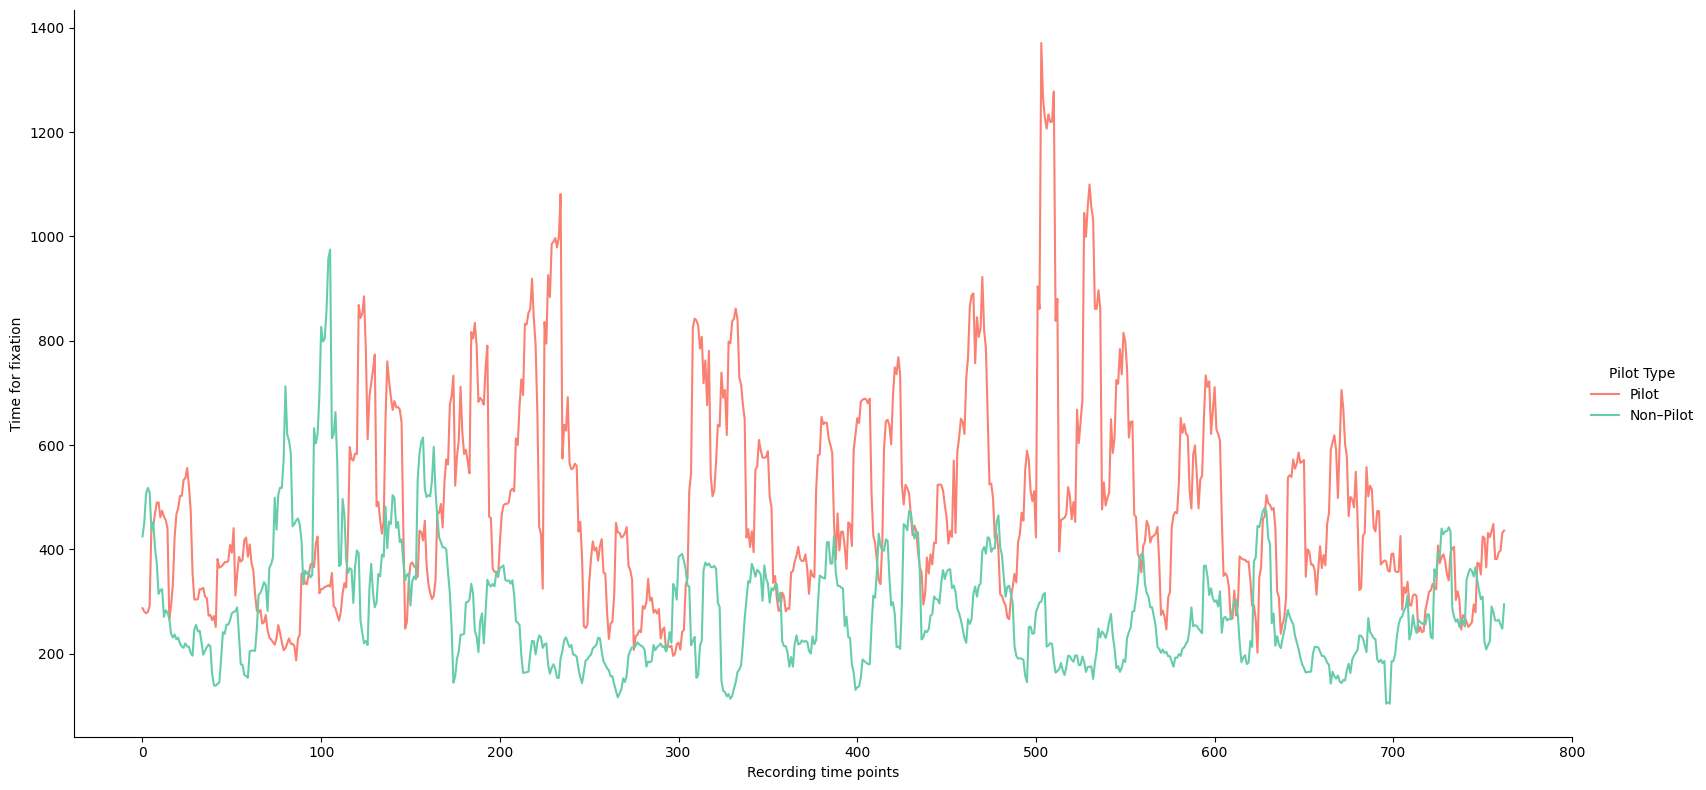

In [ ]:
plot = sb.relplot(data=combined_data, x=combined_data['level_0'], y=combined_data['duration_smoothed'], hue='Pilot Type', kind="line",
                  height=8, aspect=2, palette={'Pilot': 'salmon', 'Non–Pilot': 'mediumaquamarine'})
plot.set(xlabel="Recording time points", ylabel="Time for fixation",
         title="")  # Set y-axis limits if needed

plt.show()

### Histograms for fixation times

In [ ]:
fixations_pilot

section_id  \
500   45dedbda-204f-44af-b70b-fe31e6d89a9a   
501   45dedbda-204f-44af-b70b-fe31e6d89a9a   
502   45dedbda-204f-44af-b70b-fe31e6d89a9a   
503   45dedbda-204f-44af-b70b-fe31e6d89a9a   
504   45dedbda-204f-44af-b70b-fe31e6d89a9a   
...                                    ...   
1267  45dedbda-204f-44af-b70b-fe31e6d89a9a   
1268  45dedbda-204f-44af-b70b-fe31e6d89a9a   
1269  45dedbda-204f-44af-b70b-fe31e6d89a9a   
1270  45dedbda-204f-44af-b70b-fe31e6d89a9a   
1271  45dedbda-204f-44af-b70b-fe31e6d89a9a   

                              recording_id  fixation_id     start_timestamp  \
500   07356784-7b85-467a-9ea1-8b4ab210288e          501 2024-06-19 21:01:21   
501   07356784-7b85-467a-9ea1-8b4ab210288e          502 2024-06-19 21:01:21   
502   07356784-7b85-467a-9ea1-8b4ab210288e          503 2024-06-19 21:01:22   
503   07356784-7b85-467a-9ea1-8b4ab210288e          504 2024-06-19 21:01:22   
504   07356784-7b85-467a-9ea1-8b4ab210288e          505 2024-06-19 21:01:22   
...                                    ...          ...                 ...   
1267  07356784-7b85-467a-9ea1-8b4ab210288e         1268 2024-06-19 21:08:18   
1268  07356784-7b85-467a-9ea1-8b4ab210288e         1269 2024-06-19 21:08:18   
1269  07356784-7b85-467a-9ea1-8b4ab210288e         1270 2024-06-19 21:08:18   
1270  07356784-7b85-467a-9ea1-8b4ab210288e         1271 2024-06-19 21:08:19   
1271  07356784-7b85-467a-9ea1-8b4ab210288e         1272 2024-06-19 21:08:20   

           end_timestamp  duration  fixation_x  fixation_y   azimuth  \
500  2024-06-19 21:01:21       150     879.431     487.435  4.708141   
501  2024-06-19 21:01:22       235     833.809     701.253  1.706713   
502  2024-06-19 21:01:22       180     793.973     754.603 -0.906470   
503  2024-06-19 21:01:22       195     778.388     625.553 -1.918350   
504  2024-06-19 21:01:22       405     764.318     621.414 -2.836832   
...                  ...       ...         ...         ...       ...   
1267 2024-06-19 21:08:18       230     854.904     497.024  3.094587   
1268 2024-06-19 21:08:18       300     801.658     485.493 -0.400225   
1269 2024-06-19 21:08:19       871     838.458     511.498  2.012714   
1270 2024-06-19 21:08:20       485     905.519     562.136  6.388383   
1271 2024-06-19 21:08:20       190     779.499     581.152 -1.846257   

      elevation  duration_smoothed  
500    8.042214                NaN  
501   -5.908761                NaN  
502   -9.386789                NaN  
503   -0.965730                NaN  
504   -0.695159                NaN  
...         ...                ...  
1267   7.423358              381.7  
1268   8.178706              394.7  
1269   6.481832              397.7  
1270   3.169769              431.7  
1271   1.934578              436.2  

[772 rows x 11 columns]

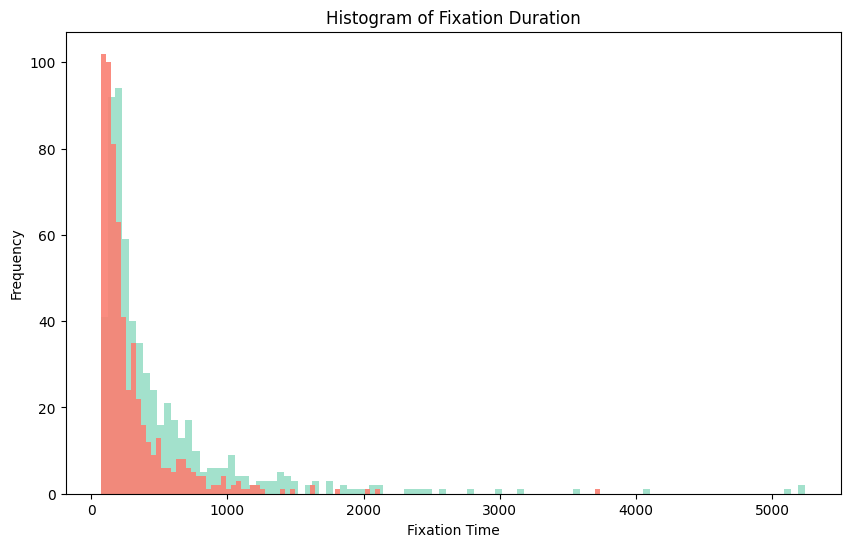

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(fixations_pilot['duration'].iloc[:600], bins=100, color='mediumaquamarine', alpha=0.6, label='Non-Pilot')
ax.hist(fixations_non_pilot['duration'].iloc[:600], bins=100, color='salmon', alpha=0.9, label='Pilot')


# Adding labels and title
ax.set_xlabel("Fixation Time")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of Fixation Duration")
plt.show()

## Significant difference for fixation duration

In [ ]:
significant_difference(fixations_non_pilot['duration'].iloc[:700], fixations_pilot['duration'].iloc[:700])

Mann-Whitney U Test: Statistics=161665.5, p-value=3.1039793861938535e-28
There is a statistically significant difference between the two datasets.


# Classification

for the dataset, we will select same number of rows for pilot and non-pilot. then, we will calculate the mean values for each second (downsampling 19 -> 1). For the final step, we will subtract the following row from the current row, so the dataset contains dynamic changes of the movement, not the static one.

### Prepare the dataset for non pilot


In [ ]:
gaze_non_pilot_to_classify = gaze_non_pilot_filtered[['timestamp', 'gaze_x', 'gaze_y', 'distance']].reset_index(drop=True)

In [ ]:
gaze_non_pilot_to_classify.head()

timestamp   gaze_x    gaze_y   distance
0 2024-05-23 15:45:23  686.099  1007.823  54.896350
1 2024-05-23 15:45:23  742.671  1032.708  61.803353
2 2024-05-23 15:45:23  690.385  1012.463  56.068581
3 2024-05-23 15:45:23  743.375  1033.172  56.892906
4 2024-05-23 15:45:23  692.841  1008.309  56.319215

In [ ]:
gaze_non_pilot_grouped = gaze_non_pilot_to_classify.groupby('timestamp').mean()

In [ ]:
gaze_non_pilot_grouped['pilot_type'] = 0

In [ ]:
gaze_non_pilot_grouped

gaze_x       gaze_y   distance  pilot_type
timestamp                                                          
2024-05-23 15:45:23  707.782600  1024.502200  52.991194           0
2024-05-23 15:45:24  684.726016   959.028943  33.004343           0
2024-05-23 15:45:25  705.824183   991.384893  24.270977           0
2024-05-23 15:45:26  699.599045   931.788126  19.701014           0
2024-05-23 15:45:27  695.004960   858.743687  22.023948           0
...                         ...          ...        ...         ...
2024-05-23 15:51:03  786.688525   878.445899   6.219283           0
2024-05-23 15:51:04  786.124789   866.292894   5.275492           0
2024-05-23 15:51:05  734.370442   769.695357  13.937041           0
2024-05-23 15:51:06  706.511497   799.129862  54.107583           0
2024-05-23 15:51:07  703.679168   792.263080  27.915267           0

[344 rows x 4 columns]

In [ ]:
fixations_non_pilot.head()

section_id                          recording_id  \
0  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
1  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
2  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
3  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   
4  ba0186f6-b5f9-4c9e-96a9-f8bf97ec60a8  17ba065b-fe2d-409d-9cc9-6b750ba4a306   

   fixation_id     start_timestamp       end_timestamp  duration  fixation_x  \
0            1 2024-05-23 15:45:24 2024-05-23 15:45:24       125     680.147   
1            2 2024-05-23 15:45:24 2024-05-23 15:45:24       165     693.138   
2            3 2024-05-23 15:45:24 2024-05-23 15:45:24       110     681.388   
3            4 2024-05-23 15:45:24 2024-05-23 15:45:25       455     675.707   
4            5 2024-05-23 15:45:25 2024-05-23 15:45:26       980     709.981   

   fixation_y   azimuth  elevation  duration_smoothed  
0     962.668 -8.739473 -22.766109                NaN  
1     959.517 -7.843286 -22.582656                NaN  
2     952.014 -8.627948 -22.083784                NaN  
3     951.455 -9.013979 -22.039280                NaN  
4     995.429 -6.765663 -24.913040                NaN

In [ ]:
fixations_non_pilot_to_classify = fixations_non_pilot[['start_timestamp', 'duration']]

In [ ]:
fixations_non_pilot_to_classify = fixations_non_pilot_to_classify.rename(columns={'start_timestamp' : 'timestamp'})

In [ ]:
fixations_non_pilot_grouped = fixations_non_pilot_to_classify.groupby('timestamp').mean()

In [ ]:
fixations_non_pilot_grouped.head()

duration
timestamp                    
2024-05-23 15:45:24    213.75
2024-05-23 15:45:25    980.00
2024-05-23 15:45:26    497.50
2024-05-23 15:45:27    652.50
2024-05-23 15:45:28    115.00

In [ ]:
eyes_non_pilot = gaze_non_pilot_grouped.merge(fixations_non_pilot_grouped, on='timestamp')

In [ ]:
eyes_non_pilot.head()

gaze_x      gaze_y   distance  pilot_type  duration
timestamp                                                                   
2024-05-23 15:45:24  684.726016  959.028943  33.004343           0    213.75
2024-05-23 15:45:25  705.824183  991.384893  24.270977           0    980.00
2024-05-23 15:45:26  699.599045  931.788126  19.701014           0    497.50
2024-05-23 15:45:27  695.004960  858.743687  22.023948           0    652.50
2024-05-23 15:45:28  682.658447  874.366259  34.856493           0    115.00

In [ ]:
eyes_non_pilot.shape

(309, 5)

In [ ]:
eyes_non_pilot = eyes_non_pilot.reset_index(drop=True)

In [ ]:
eyes_non_pilot = eyes_non_pilot.reset_index(drop=False)

In [ ]:
eyes_non_pilot.head()

index      gaze_x      gaze_y   distance  pilot_type  duration
0      0  684.726016  959.028943  33.004343           0    213.75
1      1  705.824183  991.384893  24.270977           0    980.00
2      2  699.599045  931.788126  19.701014           0    497.50
3      3  695.004960  858.743687  22.023948           0    652.50
4      4  682.658447  874.366259  34.856493           0    115.00

In [ ]:
hand_non_pilot_selected.head()

x        y       z
1 -1013.740  520.245 -40.367
2 -1013.739  520.241 -40.392
3 -1013.756  520.262 -40.407
4 -1013.397  518.785 -39.541
5 -1013.787  520.626 -40.632

In [ ]:
hand_non_pilot_selected.shape

(309, 3)

In [ ]:
hand_non_pilot_selected = hand_non_pilot_selected[100:409]

In [ ]:
hand_non_pilot_selected = hand_non_pilot_selected.reset_index(drop=True)

In [ ]:
hand_non_pilot = hand_non_pilot_selected.reset_index(drop=False)

In [ ]:
hand_non_pilot.head()

index         x        y       z
0      0 -1013.490  520.257 -40.585
1      1 -1013.509  520.127 -40.599
2      2 -1013.509  520.107 -40.574
3      3 -1013.043  519.465 -39.758
4      4 -1013.390  519.924 -40.203

In [ ]:
non_pilot = eyes_non_pilot.merge(hand_non_pilot, on='index')

In [ ]:
non_pilot.head()

index      gaze_x      gaze_y   distance  pilot_type  duration         x  \
0      0  684.726016  959.028943  33.004343           0    213.75 -1013.490   
1      1  705.824183  991.384893  24.270977           0    980.00 -1013.509   
2      2  699.599045  931.788126  19.701014           0    497.50 -1013.509   
3      3  695.004960  858.743687  22.023948           0    652.50 -1013.043   
4      4  682.658447  874.366259  34.856493           0    115.00 -1013.390   

         y       z  
0  520.257 -40.585  
1  520.127 -40.599  
2  520.107 -40.574  
3  519.465 -39.758  
4  519.924 -40.203

In [ ]:
non_pilot_dif = non_pilot.diff().dropna()
non_pilot_dif['pilot_type'] = 0

In [ ]:
non_pilot_dif.head()

gaze_x     gaze_y   distance  duration      x      y      z  pilot_type
1  21.098167  32.355950  -8.733367    766.25 -0.019 -0.130 -0.014           0
2  -6.225137 -59.596767  -4.569963   -482.50  0.000 -0.020  0.025           0
3  -4.594086 -73.044439   2.322934    155.00  0.466 -0.642  0.816           0
4 -12.346513  15.622572  12.832545   -537.50 -0.347  0.459 -0.445           0
5  12.141703 -37.963364  -3.203560    437.50 -0.106  0.245 -0.261           0

In [ ]:
non_pilot.columns

Index(['index', 'gaze_x', 'gaze_y', 'distance', 'pilot_type', 'duration', 'x',
       'y', 'z'],
      dtype='object')

In [ ]:
non_pilot = non_pilot_dif[['gaze_x', 'gaze_y', 'distance', 'duration', 'x', 'y', 'z', 'pilot_type']]

### Prepare the dataset for pilot

In [ ]:
gaze_pilot_filtered

timestamp    gaze_x   gaze_y   distance  distance_smoothed
0     2024-06-19 20:57:43  1004.618  672.953        NaN                NaN
1     2024-06-19 20:57:43  1006.607  677.726   5.170846                NaN
2     2024-06-19 20:57:43  1005.920  680.765   3.115685                NaN
3     2024-06-19 20:57:43  1010.261  679.473   4.529188                NaN
4     2024-06-19 20:57:43  1024.965  668.028  18.633187                NaN
...                   ...       ...      ...        ...                ...
68197 2024-06-19 21:03:26   592.757  569.029  20.267856          22.119615
68198 2024-06-19 21:03:26   604.443  577.792  14.606600          22.223730
68199 2024-06-19 21:03:26   589.181  579.043  15.313185          22.396363
68200 2024-06-19 21:03:26   600.787  585.026  13.057393          22.097770
68201 2024-06-19 21:03:26   620.759  584.423  19.981101          21.702068

[63723 rows x 5 columns]

In [ ]:
gaze_pilot_to_classify = gaze_pilot_filtered[['timestamp', 'gaze_x', 'gaze_y', 'distance']].reset_index(drop=True)

In [ ]:
gaze_pilot_to_classify.head()

timestamp    gaze_x   gaze_y   distance
0 2024-06-19 20:57:43  1004.618  672.953        NaN
1 2024-06-19 20:57:43  1006.607  677.726   5.170846
2 2024-06-19 20:57:43  1005.920  680.765   3.115685
3 2024-06-19 20:57:43  1010.261  679.473   4.529188
4 2024-06-19 20:57:43  1024.965  668.028  18.633187

In [ ]:
gaze_pilot_grouped = gaze_pilot_to_classify.groupby('timestamp').mean()

In [ ]:
gaze_pilot_grouped['pilot_type'] = 1

In [ ]:
gaze_pilot_grouped

gaze_x      gaze_y   distance  pilot_type
timestamp                                                          
2024-06-19 20:57:43  1011.192273  673.891091  12.127410           1
2024-06-19 20:57:44  1005.090867  596.807467  29.672526           1
2024-06-19 20:57:45   979.426239  591.334717  13.755259           1
2024-06-19 20:57:46   923.796867  659.927594   7.416289           1
2024-06-19 20:57:47   726.867849  560.780864   7.120712           1
...                          ...         ...        ...         ...
2024-06-19 21:03:22   814.397125  526.979500  10.817689           1
2024-06-19 21:03:23   806.940030  538.215874  12.402481           1
2024-06-19 21:03:24   867.404809  648.528891  14.996599           1
2024-06-19 21:03:25   905.127447  734.013648  20.139130           1
2024-06-19 21:03:26   818.545985  695.399103  22.448861           1

[342 rows x 4 columns]

In [ ]:
fixations_pilot.head()

section_id  \
500  45dedbda-204f-44af-b70b-fe31e6d89a9a   
501  45dedbda-204f-44af-b70b-fe31e6d89a9a   
502  45dedbda-204f-44af-b70b-fe31e6d89a9a   
503  45dedbda-204f-44af-b70b-fe31e6d89a9a   
504  45dedbda-204f-44af-b70b-fe31e6d89a9a   

                             recording_id  fixation_id     start_timestamp  \
500  07356784-7b85-467a-9ea1-8b4ab210288e          501 2024-06-19 21:01:21   
501  07356784-7b85-467a-9ea1-8b4ab210288e          502 2024-06-19 21:01:21   
502  07356784-7b85-467a-9ea1-8b4ab210288e          503 2024-06-19 21:01:22   
503  07356784-7b85-467a-9ea1-8b4ab210288e          504 2024-06-19 21:01:22   
504  07356784-7b85-467a-9ea1-8b4ab210288e          505 2024-06-19 21:01:22   

          end_timestamp  duration  fixation_x  fixation_y   azimuth  \
500 2024-06-19 21:01:21       150     879.431     487.435  4.708141   
501 2024-06-19 21:01:22       235     833.809     701.253  1.706713   
502 2024-06-19 21:01:22       180     793.973     754.603 -0.906470   
503 2024-06-19 21:01:22       195     778.388     625.553 -1.918350   
504 2024-06-19 21:01:22       405     764.318     621.414 -2.836832   

     elevation  duration_smoothed  
500   8.042214                NaN  
501  -5.908761                NaN  
502  -9.386789                NaN  
503  -0.965730                NaN  
504  -0.695159                NaN

In [ ]:
fixations_pilot_to_classify = fixations_pilot[['start_timestamp', 'duration']]

In [ ]:
fixations_pilot_to_classify = fixations_pilot_to_classify.rename(columns={'start_timestamp' : 'timestamp'})

In [ ]:
fixations_pilot_grouped = fixations_pilot_to_classify.groupby('timestamp').mean()

In [ ]:
fixations_pilot_grouped.head()

duration
timestamp                      
2024-06-19 21:01:21  192.500000
2024-06-19 21:01:22  251.250000
2024-06-19 21:01:23  348.333333
2024-06-19 21:01:24  262.500000
2024-06-19 21:01:25  659.250000

In [ ]:
eyes_pilot = gaze_pilot_grouped.merge(fixations_pilot_grouped, on='timestamp')

In [ ]:
eyes_pilot.head()

gaze_x      gaze_y   distance  pilot_type    duration
timestamp                                                                     
2024-06-19 21:01:21  839.847216  579.878141  13.655131           1  192.500000
2024-06-19 21:01:22  775.595480  664.248615  13.089210           1  251.250000
2024-06-19 21:01:23  818.587875  714.074220  13.921909           1  348.333333
2024-06-19 21:01:24  786.908155  621.349915  13.145459           1  262.500000
2024-06-19 21:01:25  777.874658  646.552030  13.850666           1  659.250000

In [ ]:
eyes_pilot.shape

(99, 5)

In [ ]:
eyes_pilot = eyes_pilot.reset_index(drop=True)

In [ ]:
eyes_pilot = eyes_pilot.reset_index(drop=False)

In [ ]:
eyes_pilot.head()

index      gaze_x      gaze_y   distance  pilot_type    duration
0      0  839.847216  579.878141  13.655131           1  192.500000
1      1  775.595480  664.248615  13.089210           1  251.250000
2      2  818.587875  714.074220  13.921909           1  348.333333
3      3  786.908155  621.349915  13.145459           1  262.500000
4      4  777.874658  646.552030  13.850666           1  659.250000

In [ ]:
hand_pilot_selected.head()

x        y       z
1  1257.308 -192.500  48.753
2  1257.311 -192.520  48.747
3  1257.304 -192.529  48.748
4  1257.302 -192.536  48.740
5  1257.294 -192.516  48.739

In [ ]:
hand_pilot_selected.shape

(42776, 3)

In [ ]:
hand_pilot_selected = hand_pilot_selected[1000:1099]

In [ ]:
hand_pilot_selected = hand_pilot_selected.reset_index(drop=True)

In [ ]:
hand_pilot = hand_pilot_selected.reset_index(drop=False)

In [ ]:
hand_pilot.head()

index         x        y        z
0      0  1262.438 -183.215  137.167
1      1  1263.227 -183.058  137.918
2      2  1264.027 -182.856  138.603
3      3  1264.823 -182.769  139.292
4      4  1265.593 -182.598  140.027

In [ ]:
pilot = eyes_pilot.merge(hand_pilot, on='index')

In [ ]:
pilot.head()

index      gaze_x      gaze_y   distance  pilot_type    duration         x  \
0      0  839.847216  579.878141  13.655131           1  192.500000  1262.438   
1      1  775.595480  664.248615  13.089210           1  251.250000  1263.227   
2      2  818.587875  714.074220  13.921909           1  348.333333  1264.027   
3      3  786.908155  621.349915  13.145459           1  262.500000  1264.823   
4      4  777.874658  646.552030  13.850666           1  659.250000  1265.593   

         y        z  
0 -183.215  137.167  
1 -183.058  137.918  
2 -182.856  138.603  
3 -182.769  139.292  
4 -182.598  140.027

In [ ]:
pilot.columns

Index(['index', 'gaze_x', 'gaze_y', 'distance', 'pilot_type', 'duration', 'x',
       'y', 'z'],
      dtype='object')

In [ ]:
pilot_dif = pilot.diff().dropna()

In [ ]:
pilot_dif.head()

gaze_x     gaze_y  distance    duration      x      y      z  pilot_type
1 -64.251736  84.370474 -0.565920   58.750000  0.789  0.157  0.751           1
2  42.992395  49.825605  0.832699   97.083333  0.800  0.202  0.685           1
3 -31.679720 -92.724305 -0.776450  -85.833333  0.796  0.087  0.689           1
4  -9.033497  25.202115  0.705207  396.750000  0.770  0.171  0.735           1
5   1.385211 -47.002513  1.080620 -419.250000  0.789 -0.047  0.539           1

In [ ]:
pilot_dif['pilot_type'] = 1

In [ ]:
pilot = pilot_dif[['gaze_x', 'gaze_y', 'distance', 'duration', 'x', 'y', 'z', 'pilot_type']]

In [ ]:
data = pd.concat([pilot, non_pilot], ignore_index=True)

In [ ]:
data.shape

(406, 8)

## ML

here we just tried we ml classifiers. the best one is decision tree.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[31,  1],
       [ 8,  1]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7804878048780488

### SVM

In [ ]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 9,  0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.7804878048780488

### Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 1,  8]])

In [ ]:
accuracy_score(y_test, y_pred)

0.975609756097561

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[25,  7],
       [ 0,  9]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8292682926829268

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[32,  0],
       [ 3,  6]])

In [ ]:
accuracy_score(y_test, y_pred)

0.926829268292683

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  5],
       [ 3,  6]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8048780487804879